In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lasio
import math
#import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
import pickle


c:\Users\MGD\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# SAVE-LOAD using pickle #
##########################


# save
#with open('model.pkl','wb') as f:
#    pickle.dump(clf,f)

# load
#with open('model.pkl', 'rb') as f:
#    clf2 = pickle.load(f)

In [3]:
well1 = lasio.read('7buz12rjs_editadas.las') #Amarracao com a sismica disponivel
well2 = lasio.read('7-buz-14da-rjs_curvas_basicas.las') #Amarracao com a sismica disponivel
well3 = lasio.read('7-buz-23-rjs_curvas_basicas.las') #Amarracao com a sismica disponivel
well4 = lasio.read('7-buz-25-rjs_curvas_basicas.las') #Amarracao com a sismica disponivel
well5 = lasio.read('7-buz-29d-rjs_curvas_basicas.las') #Amarracao com a sismica disponivel
well6 = lasio.read('7-buz-31d-rjs_curvas_basicas.las') #Amarracao com a sismica disponivel
well7 = lasio.read('8-BUZ-21D-RJS_editadas.las') #Amarracao com a sismica disponivel
well8 = lasio.read('8-buz-26-rjs_curvas_basicas.las') #Amarracao com a sismica disponivel
well9 = lasio.read('8-buz-28da-rjs_curvas_basicas.las') #Amarracao com a sismica disponivel
well10 = lasio.read('8-buz-32da-rjs_curvas_basicas.las') #Amarracao com a sismica disponivel
well11 = lasio.read('8buz15rjs_edit.las') #Amarracao com a sismica disponivel
well12 = lasio.read('8buz20rjs_editadas.las') #Amarracao com a sismica disponivel
well13 = lasio.read('3-BRSA-1184-RJS-las.las') 
well14 = lasio.read('7-BUZ-10-RJS-las.las') #Amarracao com a sismica disponivel
well15 = lasio.read('7-BUZ-30-RJS-las.las') #Amarracao com a sismica disponivel
well16 = lasio.read('8-BUZ-9-RJS-las.las')
well20 = lasio.read('9-BRSA-1191-RJS-las.las') #converter nphi para porcentagem #Amarracao com a sismica disponivel
well18 = lasio.read('9-BUZ-4-RJS-las.las') #Amarracao com a sismica disponivel
well19 = lasio.read('9-BUZ-8-RJS-las.las')

##
well17 = lasio.read('9-BRSA-1197-RJS-las.las') #Utilizar para gerar figura, converter nphi para porcentagem

In [4]:
for item in well8.sections['Well']:
    print(f"{item.descr} ({item.mnemonic}): \t\t {item.value}")

Start Depth (STRT): 		 2169.0613
Stop  Depth (STOP): 		 6203.1372
Step (STEP): 		 0.1524
Null Value (NULL): 		 -999.25
Company (COMP): 		 PETROLEO BRASILEIRO S/A
Origem dos dados (ORIG): 		 SIGEO EXPORTACAO PERFIL
Well (WELL): 		 8-BUZ-26-RJS
Field (FLD): 		 BUZIOS
State (STAT): 		 RIO DE JANEIRO
API Code(Cadastro ANP) (APIN): 		 74316029174
Surface X (X): 		 755548.01
Surface Y (Y): 		 7254669.99
Horizontal Coordinate System (HZCS): 		 UTM
Meridiano Central (MC): 		 45 W
Latitude (LATI): 		 -24:48:05,265
Longitude (LONG): 		 -42:28:19,707
Geodetic Datum (GDAT): 		 SIRGAS2000
Log Measure From (LMF): 		 MR
Elevation Derrick Floor (EDF): 		 33.0
Water Depth to Mean Sea Level (WDMS): 		 2043.0


In [5]:
print('Well 1 (7buz12rjs) curves:')
print(well1.curves)
print('Well 2 (7-buz-14da-rjs) curves:')
print(well2.curves)
print('Well 3 (7-buz-23-rjs) curves:')
print(well3.curves)
print('Well 4 (7-buz-25-rjs) curves:')
print(well4.curves)
print('Well 5 (7-buz-29d-rjs) curves:')
print(well5.curves)
print('Well 6 (7-buz-31d-rjs) curves:')
print(well6.curves)
print('Well 7 (8-BUZ-21D-RJS) curves:')
print(well7.curves)
print('Well 8 (8-buz-26-rjs) curves:')
print(well8.curves)

Well 1 (7buz12rjs) curves:
Mnemonic  Unit   Value  Description             
--------  ----   -----  -----------             
DEPT      M             Measured Depth          
BRCALI    in            CALIPER                 
BRDENS    g/cm3         DENSIDADE               
BRDTP     us/ft         SONICO COMPRESSIONAL    
BRDTS     us/ft         SONICO CISALHANTE       
BRGR      gAPI          RAIOS GAMA              
BRNEUT    %             POROSIDADE NEUTRONICA   
BRRESC    ohm.m         RESISTIVIDADE RASA      
BRRESM    ohm.m         RESISTIVIDADE MEDIA     
BRRESP    ohm.m         RESISTIVIDADE PROFUNDA  
BRTTI     data          TTI                     
Well 2 (7-buz-14da-rjs) curves:
Mnemonic  Unit   Value  Description             
--------  ----   -----  -----------             
DEPT      M             Measured Depth          
BRCALI    in            CALIPER                 
BRDENS    g/cm3         DENSIDADE               
BRDTP     us/ft         SONICO COMPRESSIONAL    
BRDTS     

In [6]:
well1_df = well1.df()
well2_df = well2.df()
well3_df = well3.df()
well4_df = well4.df()
well5_df = well5.df()
well6_df = well6.df()
well7_df = well7.df()
well8_df = well8.df()
well9_df = well9.df()
well10_df = well10.df()
well11_df = well11.df()
well12_df = well12.df()
well13_df = well13.df()
well14_df = well14.df()
well15_df = well15.df()
well16_df = well16.df()
well17_df = well17.df()
well18_df = well18.df()
well19_df = well19.df()
well20_df = well20.df()

In [7]:
well1_df.head()

BRCALI  BRDENS  BRDTP  BRDTS     BRGR  BRNEUT  BRRESC  BRRESM  \
DEPT                                                                       
2118.0601     NaN     NaN    NaN    NaN  14.8566     NaN     NaN     NaN   
2118.2125     NaN     NaN    NaN    NaN  17.6459     NaN     NaN     NaN   
2118.3649     NaN     NaN    NaN    NaN  23.9488     NaN     NaN     NaN   
2118.5173     NaN     NaN    NaN    NaN  21.7061     NaN     NaN     NaN   
2118.6697     NaN     NaN    NaN    NaN  22.0604     NaN     NaN     NaN   

           BRRESP  BRTTI  
DEPT                      
2118.0601     NaN    NaN  
2118.2125     NaN    NaN  
2118.3649     NaN    NaN  
2118.5173     NaN    NaN  
2118.6697     NaN    NaN

In [8]:
well1_df_filt = well1_df.dropna(how='any',axis=0)
well2_df_filt = well2_df.dropna(how='any',axis=0)
well3_df_filt = well3_df.dropna(how='any',axis=0)
well4_df_filt = well4_df.dropna(how='any',axis=0)
well5_df_filt = well5_df.dropna(how='any',axis=0)
well6_df_filt = well6_df.dropna(how='any',axis=0)
well7_df_filt = well7_df.dropna(how='any',axis=0)
well8_df_filt = well8_df.dropna(how='any',axis=0)
well9_df_filt = well9_df.dropna(how='any',axis=0)
well10_df_filt = well10_df.dropna(how='any',axis=0)
well11_df_filt = well11_df.dropna(how='any',axis=0)
well12_df_filt = well12_df.dropna(how='any',axis=0)
well13_df_filt = well13_df.dropna(how='any',axis=0)
well14_df_filt = well14_df.dropna(how='any',axis=0)
well15_df_filt = well15_df.dropna(how='any',axis=0)
well16_df_filt = well16_df.dropna(how='any',axis=0)
well17_df_filt = well17_df.dropna(how='any',axis=0)
well18_df_filt = well18_df.dropna(how='any',axis=0)
well19_df_filt = well19_df.dropna(how='any',axis=0)
well20_df_filt = well20_df.dropna(how='any',axis=0)

In [9]:
print('Well 1 Dataframe:')
print(well1_df_filt.head())
print('Well 2 Dataframe:')
print(well2_df_filt.head())

Well 1 Dataframe:
            BRCALI  BRDENS    BRDTP    BRDTS     BRGR   BRNEUT      BRRESC  \
DEPT                                                                         
5316.1741  12.8824  2.3190  51.4273  98.1754  18.4464   8.3490   1714.9304   
5316.3265  12.9422  2.3223  52.7848  97.6764  19.8132   8.0462  53894.1484   
5316.4789  12.9616  2.3234  53.5890  96.9561  22.8249   8.1772  52209.8984   
5316.6313  12.9788  2.3092  55.1620  95.7063  25.7452   9.8391    262.9822   
5316.7837  13.0032  2.2937  57.1258  93.4206  29.5762  13.1880    273.1518   

               BRRESM      BRRESP  BRTTI  
DEPT                                      
5316.1741   2702.6018  28320.9492    0.0  
5316.3265  85688.9766      0.9806    0.0  
5316.4789  83003.2266   3054.6370    0.0  
5316.6313    170.4262  97133.5469    0.0  
5316.7837    274.1594  97133.5469    0.0  
Well 2 Dataframe:
            BRCALI  BRDENS    BRDTP    BRDTS     BRGR  BRNEUT     BRRESC  \
DEPT                                    

In [10]:
#Carregando as curvas

data1 = well1_df_filt
res = np.array(data1['BRRESP'])[+500:-1900]
rho = np.array(data1['BRDENS'])[+500:-1900]
dtp = np.array(data1['BRDTP'])[+500:-1900]
dts = np.array(data1['BRDTS'])[+500:-1900]
phi = np.array(data1['BRNEUT'])[+500:-1900]
gr = np.array(data1['BRGR'])[+500:-1900]
z = data1.index[+500:-1900]

vp = (10**3/dtp)*0.3048 #km/s
vs = (10**3/dts)*0.3048 #km/s

#########

data2 = well2_df_filt
res2 = np.array(data2['BRRESP'])
rho2 = np.array(data2['BRDENS'])
dtp2 = np.array(data2['BRDTP'])
dts2 = np.array(data2['BRDTS'])
phi2 = np.array(data2['BRNEUT'])
gr2 = np.array(data2['BRGR'])
z2 = data2.index

vp2 = (10**3/dtp2)*0.3048 #km/s
vs2 = (10**3/dts2)*0.3048 #km/s

#########

data3 = well3_df_filt
res3 = np.array(data3['BRRESP'])[+150:]
rho3 = np.array(data3['BRDENS'])[+150:]
dtp3 = np.array(data3['BRDTP'])[+150:]
dts3 = np.array(data3['BRDTS'])[+150:]
phi3 = np.array(data3['BRNEUT'])[+150:]
gr3 = np.array(data3['BRGR'])[+150:]
z3 = data3.index[+150:]

vp3 = (10**3/dtp3)*0.3048 #km/s
vs3 = (10**3/dts3)*0.3048 #km/s

#########

data4 = well4_df_filt
res4 = np.array(data4['BRRESP'])
rho4 = np.array(data4['BRDENS'])
dtp4 = np.array(data4['BRDTP'])
phi4 = np.array(data4['BRNEUT'])
gr4 = np.array(data4['BRGR'])
z4 = data4.index

vp4 = (10**3/dtp4)*0.3048 #km/s

#########

data5 = well5_df_filt
res5 = np.array(data5['BRRESP'])[+150:]
rho5 = np.array(data5['BRDENS'])[+150:]
dtp5 = np.array(data5['BRDTP'])[+150:]
phi5 = np.array(data5['BRNEUT'])[+150:]
gr5 = np.array(data5['BRGR'])[+150:]
z5 = data5.index[+150:]

vp5 = (10**3/dtp5)*0.3048 #km/s

#########

data6 = well6_df_filt
res6 = np.array(data6['BRRESP'])[+150:]
rho6 = np.array(data6['BRDENS'])[+150:]
dtp6 = np.array(data6['BRDTP'])[+150:]
phi6 = np.array(data6['BRNEUT'])[+150:]
gr6 = np.array(data6['BRGR'])[+150:]
z6 = data6.index[+150:]

vp6 = (10**3/dtp6)*0.3048 #km/s

#########

data7 = well7_df_filt
res7 = np.array(data7['BRRESP'])[+400:]
rho7 = np.array(data7['BRDENS'])[+400:]
dtp7 = np.array(data7['BRDTP'])[+400:]
phi7 = np.array(data7['BRNEUT'])[+400:]
gr7 = np.array(data7['BRGR'])[+400:]
z7 = data7.index[+400:]

vp7 = (10**3/dtp7)*0.3048 #km/s

#########

data8 = well8_df_filt
res8 = np.array(data8['BRRESP'])[+14200:]
rho8 = np.array(data8['BRDENS'])[+14200:]
dtp8 = np.array(data8['BRDTP'])[+14200:]
phi8 = np.array(data8['BRNEUT'])[+14200:]
gr8 = np.array(data8['BRGR'])[+14200:]
z8 = data8.index[+14200:]

vp8 = (10**3/dtp8)*0.3048 #km/s

#########

data9 = well9_df_filt
res9 = np.array(data9['BRRESP'])
rho9 = np.array(data9['BRDENS'])
dtp9 = np.array(data9['BRDTP'])
phi9 = np.array(data9['BRNEUT'])
gr9 = np.array(data9['BRGR'])
z9 = data9.index

vp9 = (10**3/dtp9)*0.3048 #km/s

#########

data10 = well10_df_filt
res10 = np.array(data10['BRRESP'])
rho10 = np.array(data10['BRDENS'])
dtp10 = np.array(data10['BRDTP'])
phi10 = np.array(data10['BRNEUT'])
gr10 = np.array(data10['BRGR'])
z10 = data10.index

vp10 = (10**3/dtp10)*0.3048 #km/s

#########

data11 = well11_df_filt
res11 = np.array(data11['BRRESP'])
rho11 = np.array(data11['BRDENS'])
dtp11 = np.array(data11['BRDTP'])
phi11 = np.array(data11['BRNEUT'])
gr11 = np.array(data11['BRGR'])
z11 = data11.index

vp11 = (10**3/dtp11)*0.3048 #km/s

#########

data12 = well12_df_filt
res12 = np.array(data12['BRRESP'])
rho12 = np.array(data12['BRDENS'])
dtp12 = np.array(data12['BRDTP'])
phi12 = np.array(data12['BRNEUT'])
gr12 = np.array(data12['BRGR'])
z12 = data12.index

vp12 = (10**3/dtp12)*0.3048 #km/s

#########

data13 = well13_df_filt
res13 = np.array(data13['M2RX'])[+500:-500]
rho13 = np.array(data13['ZDEN'])[+500:-500]
dtp13 = np.array(data13['DTPM'])[+500:-500]
phi13 = np.array(data13['CN'])[+500:-500]
gr13 = np.array(data13['GR'])[+500:-500]
z13 = data13.index[+500:-500]

vp13 = (10**3/dtp13)*0.3048 #km/s

#########

data14 = well14_df_filt
res14 = np.array(data14['RT90'])[+500:-500]
rho14 = np.array(data14['RHOB'])[+500:-500]
dtp14 = np.array(data14['DT'])[+500:-500]
phi14 = np.array(data14['NPHI'])[+500:-500]
gr14 = np.array(data14['GR'])[+500:-500]
z14 = data14.index[+500:-500]

vp14 = (10**3/dtp14)*0.3048 #km/s

#########

data15 = well15_df_filt
res15 = np.array(data15['EDD6'])
rho15 = np.array(data15['RHOB'])
dtp15 = np.array(data15['DT'])
phi15 = np.array(data15['NPHI'])
gr15 = np.array(data15['GRCO'])
z15 = data15.index

vp15 = (10**3/dtp15)*0.3048 #km/s

#########

data16 = well16_df_filt
res16 = np.array(data16['RT90'])
rho16 = np.array(data16['RHOB'])
dtp16 = np.array(data16['DT'])
phi16 = np.array(data16['TNPH'])*100
gr16 = np.array(data16['GR'])
z16 = data16.index

vp16 = (10**3/dtp16)*0.3048 #km/s

#########

data20 = well20_df
res20 = np.array(data20['AT90'])[+400:-200]
rho20 = np.array(data20['RHOZ'])[+400:-200]
dtp20 = np.array(data20['DTCO'])[+400:-200]
#dtp20 = np.array(data20['DTCO'])[+400:-200]
phi20 = np.array(data20['NPHI'])[+400:-200]*100
gr20 = np.array(data20['GR'])[+400:-200]
z20 = data20.index[+400:-200]

vp20 = (10**3/dtp20)*0.3048 #km/s

#########

data18 = well18_df_filt
res18 = np.array(data18['RT90'])
rho18 = np.array(data18['RHOB'])
dtp18 = np.array(data18['DT'])
phi18 = np.array(data18['NPHI'])
gr18 = np.array(data18['GRCO'])
z18 = data18.index

vp18 = (10**3/dtp18)*0.3048 #km/s

#########

data19 = well19_df_filt
res19 = np.array(data19['RT90'])
rho19 = np.array(data19['RHOB'])
dtp19 = np.array(data19['DT'])
phi19 = np.array(data19['NPHI'])
gr19 = np.array(data19['GRCO'])
z19 = data19.index

vp19 = (10**3/dtp19)*0.3048 #km/s


#########

# Dado para gerar figura

data17 = well17_df_filt
res17 = np.array(data17['RT'])[+450:-200]
rho17 = np.array(data17['RHOZ'])[+450:-200]
dtp17 = np.array(data17['DTCO'])[+700:-420]
phi17 = np.array(data17['HNPO'])[+450:-200]*100
gr17 = np.array(data17['GR'])[+450:-200]
z17 = data17.index[+450:-200]
z17_vp = data17.index[+700:-420]

vp17 = (10**3/dtp17)*0.3048 #km/s

Text(0.5, 34.99999999999995, 'Resistivity (Ohm.m)')

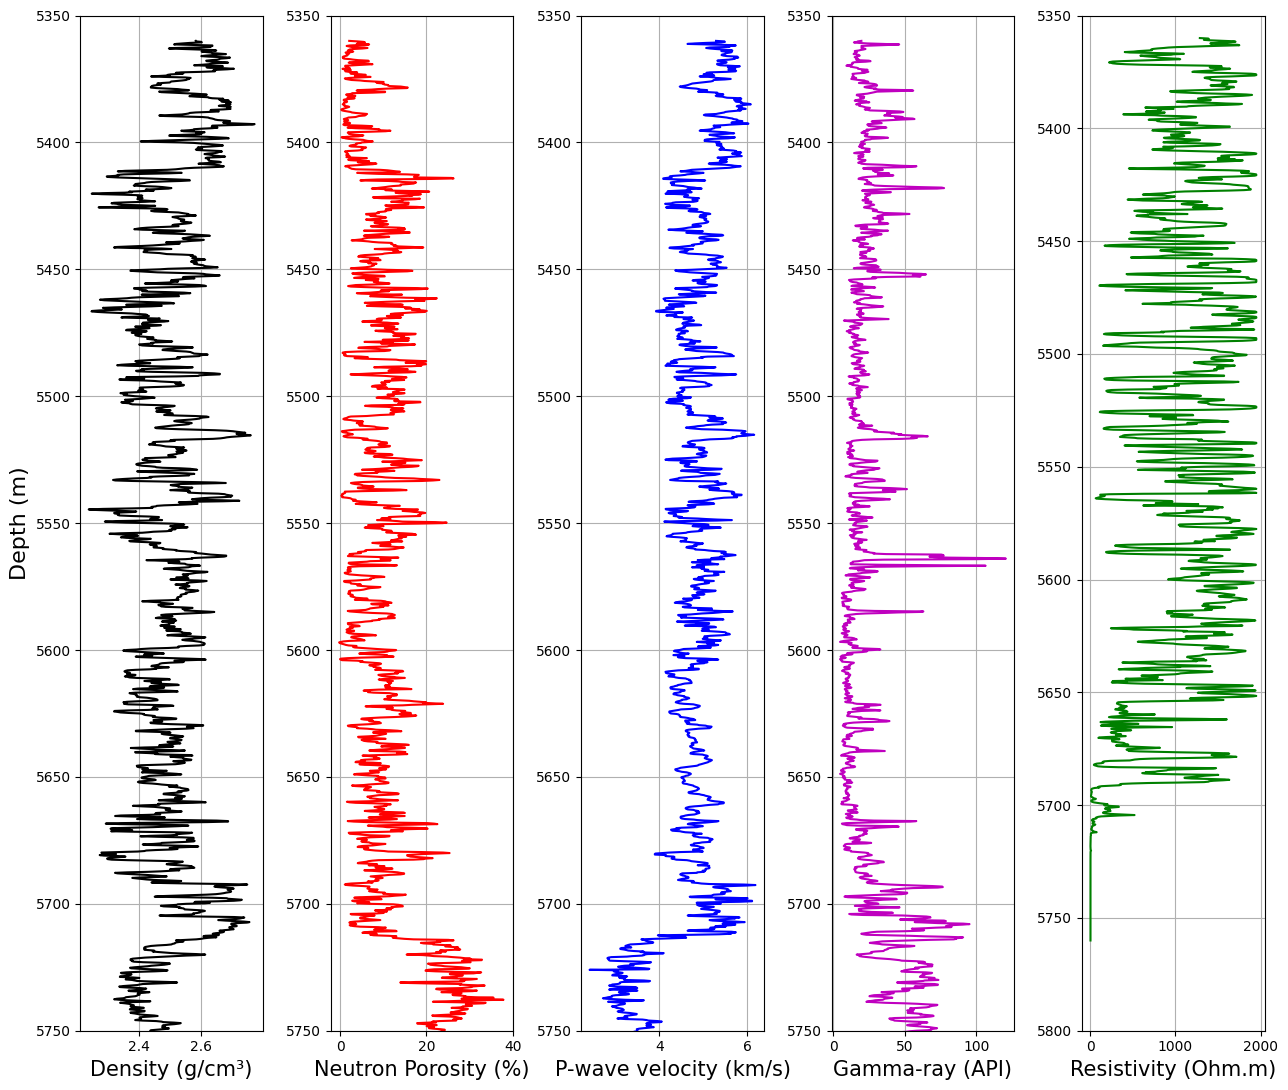

In [11]:
plt.figure(figsize=(13,11))

plt.subplot(1,5,1)
plt.plot(rho20,z20,'k')
plt.grid()
plt.ylim([5350, 5750])
plt.gca().invert_yaxis()
plt.xlabel('Density (g/cm³)', fontsize=15)
plt.ylabel('Depth (m)', fontsize=16)

plt.subplot(1,5,2)
plt.tight_layout()
plt.plot(phi20,z20,'r')
plt.grid()
plt.ylim([5350, 5750])
plt.gca().invert_yaxis()
plt.xlabel('Neutron Porosity (%)', fontsize=15)

plt.subplot(1,5,3)
plt.tight_layout()
plt.plot(vp20,z20,'b')
#plt.plot(vp20,z20,'b')
plt.grid()
plt.ylim([5350, 5750])
plt.gca().invert_yaxis()
plt.xlabel('P-wave velocity (km/s)', fontsize=15)

plt.subplot(1,5,4)
plt.tight_layout()
plt.plot(gr20,z20,'m')
plt.grid()
plt.ylim([5350, 5750])
plt.gca().invert_yaxis()
plt.xlabel('Gamma-ray (API)', fontsize=15)

plt.subplot(1,5,5)
plt.tight_layout()
plt.plot(res20,z20,'g')
plt.grid()
plt.ylim([5350, 5800])
plt.gca().invert_yaxis()
plt.xlabel('Resistivity (Ohm.m)', fontsize=15)
#plt.savefig('well20.png')

Text(0.5, 34.99999999999995, 'Gamma-ray (API)')

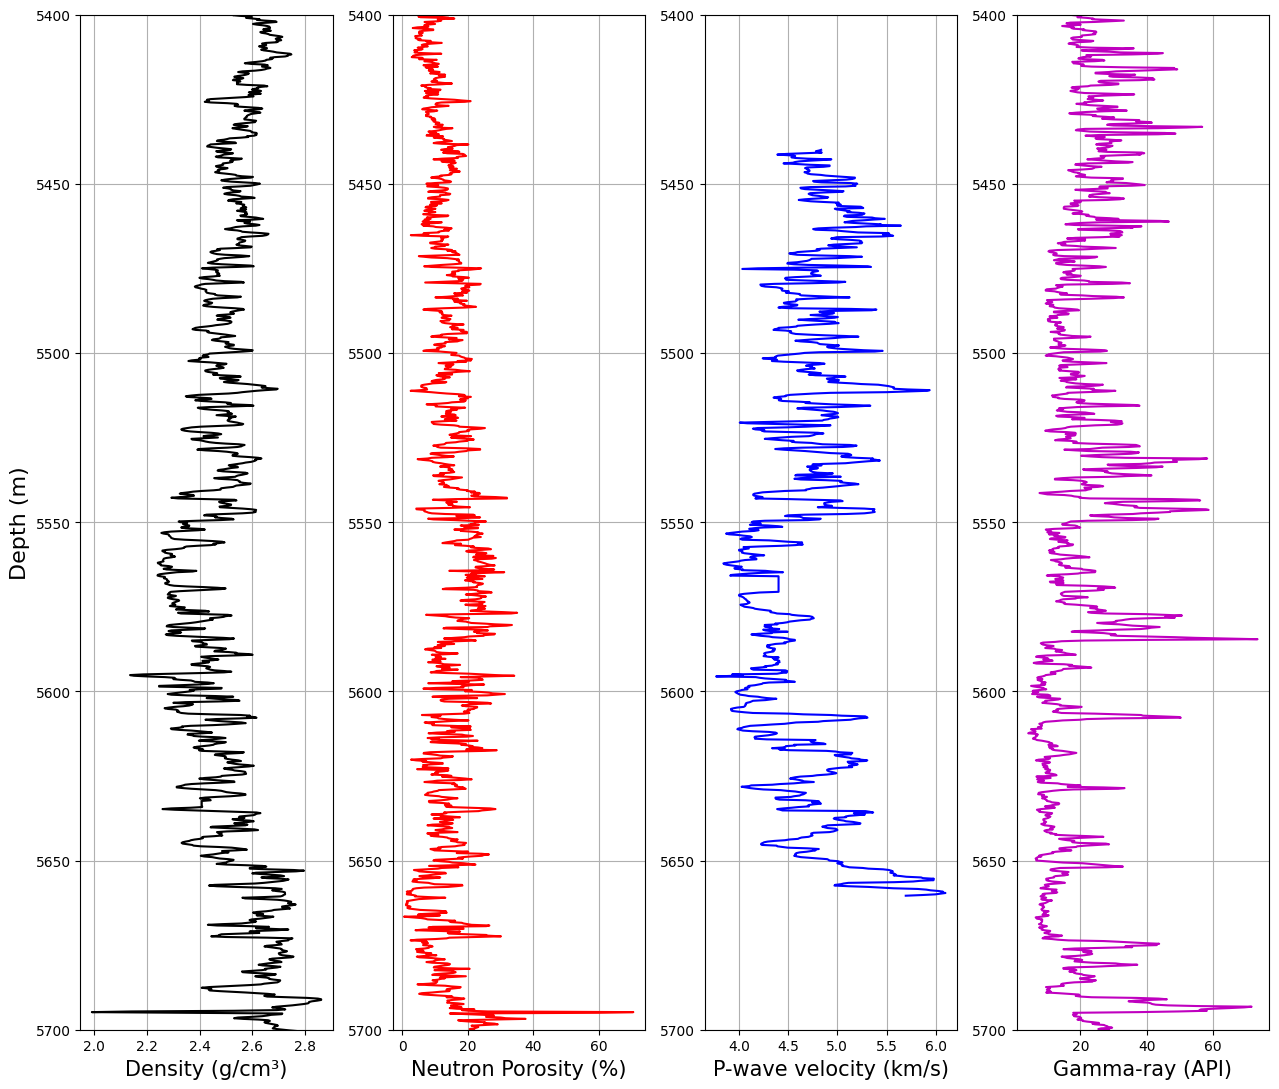

In [12]:
plt.figure(figsize=(13,11))

plt.subplot(1,4,1)
plt.plot(rho17,z17,'k')
plt.grid()
plt.ylim([5400, 5700])
plt.gca().invert_yaxis()
plt.xlabel('Density (g/cm³)', fontsize=15)
plt.ylabel('Depth (m)', fontsize=16)

plt.subplot(1,4,2)
plt.tight_layout()
plt.plot(phi17,z17,'r')
plt.grid()
plt.ylim([5400, 5700])
plt.gca().invert_yaxis()
plt.xlabel('Neutron Porosity (%)', fontsize=15)

plt.subplot(1,4,3)
plt.tight_layout()
plt.plot(vp17,z17_vp,'b')
plt.grid()
plt.ylim([5400, 5700])
plt.gca().invert_yaxis()
plt.xlabel('P-wave velocity (km/s)', fontsize=15)

plt.subplot(1,4,4)
plt.tight_layout()
plt.plot(gr17,z17,'m')
plt.grid()
plt.ylim([5400, 5700])
plt.gca().invert_yaxis()
plt.xlabel('Gamma-ray (API)', fontsize=15)

#plt.savefig('well17.png')

Text(0.5, 35.000000000000036, 'Resistivity (Ohm.m)')

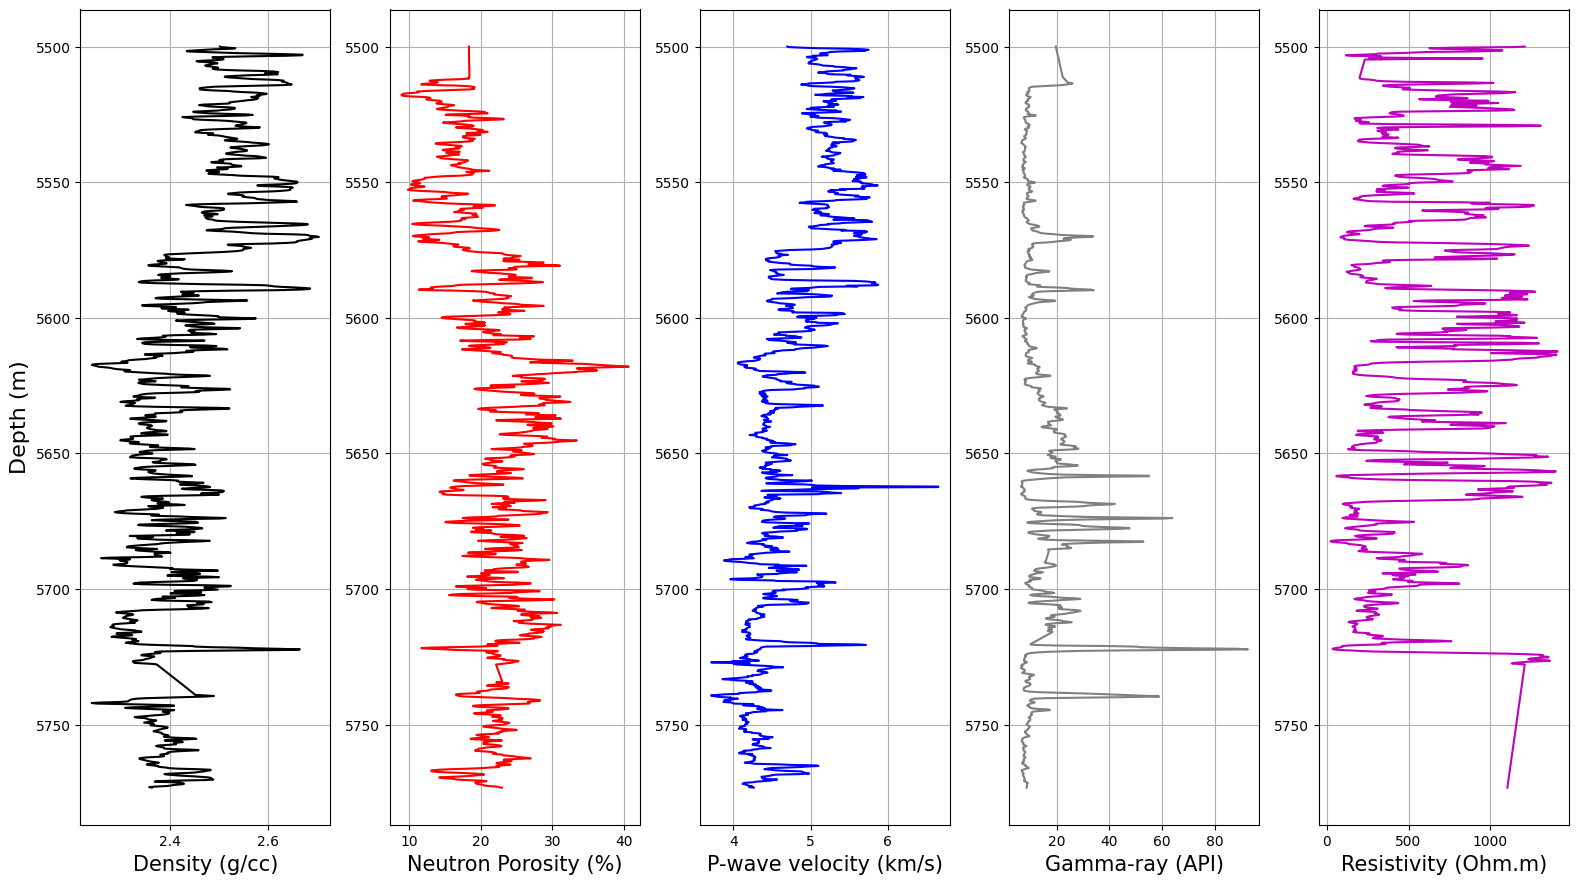

In [13]:
plt.figure(figsize=(16,9))

plt.subplot(1,5,1)
plt.plot(rho13,z13,'k')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('Density (g/cc)', fontsize=15)
plt.ylabel('Depth (m)', fontsize=16)

plt.subplot(1,5,2)
plt.tight_layout()
plt.plot(phi13,z13,'r')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('Neutron Porosity (%)', fontsize=15)

plt.subplot(1,5,3)
plt.tight_layout()
plt.plot(vp13,z13,'b')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('P-wave velocity (km/s)', fontsize=15)

plt.subplot(1,5,4)
plt.tight_layout()
plt.plot(gr13,z13,'gray')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('Gamma-ray (API)', fontsize=15)

plt.subplot(1,5,5)
plt.tight_layout()
plt.plot(res13,z13,'m')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('Resistivity (Ohm.m)', fontsize=15)
#plt.savefig('well1.png')

Text(0.5, 35.000000000000036, 'Resistivity (Ohm.m)')

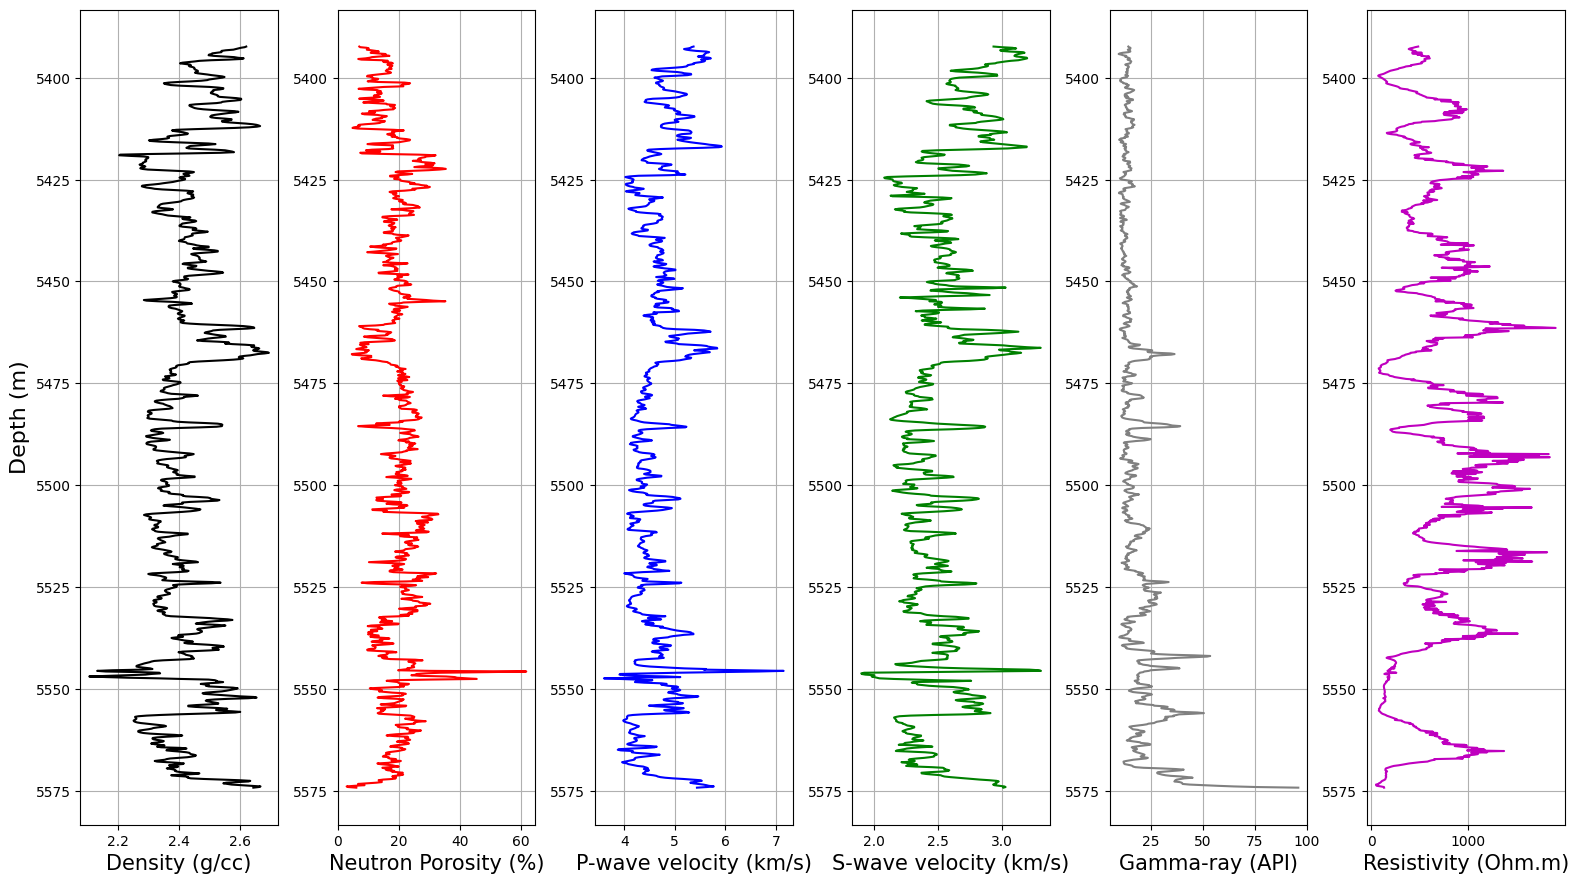

In [14]:
plt.figure(figsize=(16,9))

plt.subplot(1,6,1)
plt.plot(rho,z,'k')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('Density (g/cc)', fontsize=15)
plt.ylabel('Depth (m)', fontsize=16)

plt.subplot(1,6,2)
plt.tight_layout()
plt.plot(phi,z,'r')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('Neutron Porosity (%)', fontsize=15)

plt.subplot(1,6,3)
plt.tight_layout()
plt.plot(vp,z,'b')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('P-wave velocity (km/s)', fontsize=15)

plt.subplot(1,6,4)
plt.tight_layout()
plt.plot(vs,z,'g')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('S-wave velocity (km/s)', fontsize=15)

plt.subplot(1,6,5)
plt.tight_layout()
plt.plot(gr,z,'gray')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('Gamma-ray (API)', fontsize=15)

plt.subplot(1,6,6)
plt.tight_layout()
plt.plot(res,z,'m')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('Resistivity (Ohm.m)', fontsize=15)
#plt.savefig('well1.png')

Text(0.5, 35.000000000000036, 'Resistivity (Ohm.m)')

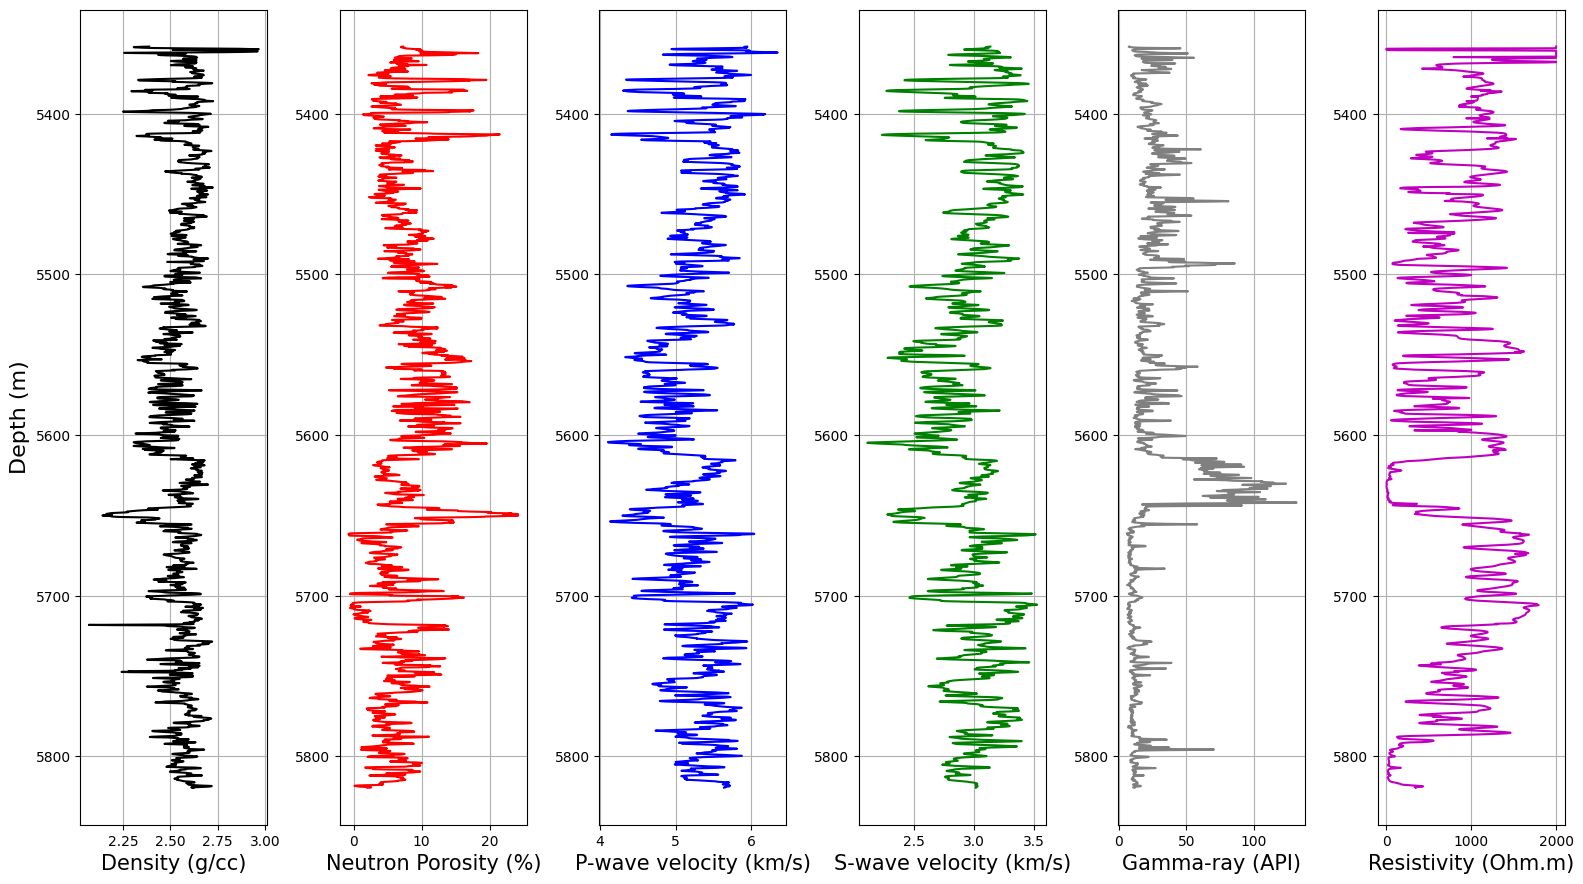

In [15]:
plt.figure(figsize=(16,9))

plt.subplot(1,6,1)
plt.plot(rho2,z2,'k')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('Density (g/cc)', fontsize=15)
plt.ylabel('Depth (m)', fontsize=16)

plt.subplot(1,6,2)
plt.tight_layout()
plt.plot(phi2,z2,'r')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('Neutron Porosity (%)', fontsize=15)

plt.subplot(1,6,3)
plt.tight_layout()
plt.plot(vp2,z2,'b')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('P-wave velocity (km/s)', fontsize=15)

plt.subplot(1,6,4)
plt.tight_layout()
plt.plot(vs2,z2,'g')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('S-wave velocity (km/s)', fontsize=15)

plt.subplot(1,6,5)
plt.tight_layout()
plt.plot(gr2,z2,'gray')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('Gamma-ray (API)', fontsize=15)

plt.subplot(1,6,6)
plt.tight_layout()
plt.plot(res2,z2,'m')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('Resistivity (Ohm.m)', fontsize=15)
#plt.savefig('well2.png')

Text(0.5, 35.000000000000036, 'Resistivity (Ohm.m)')

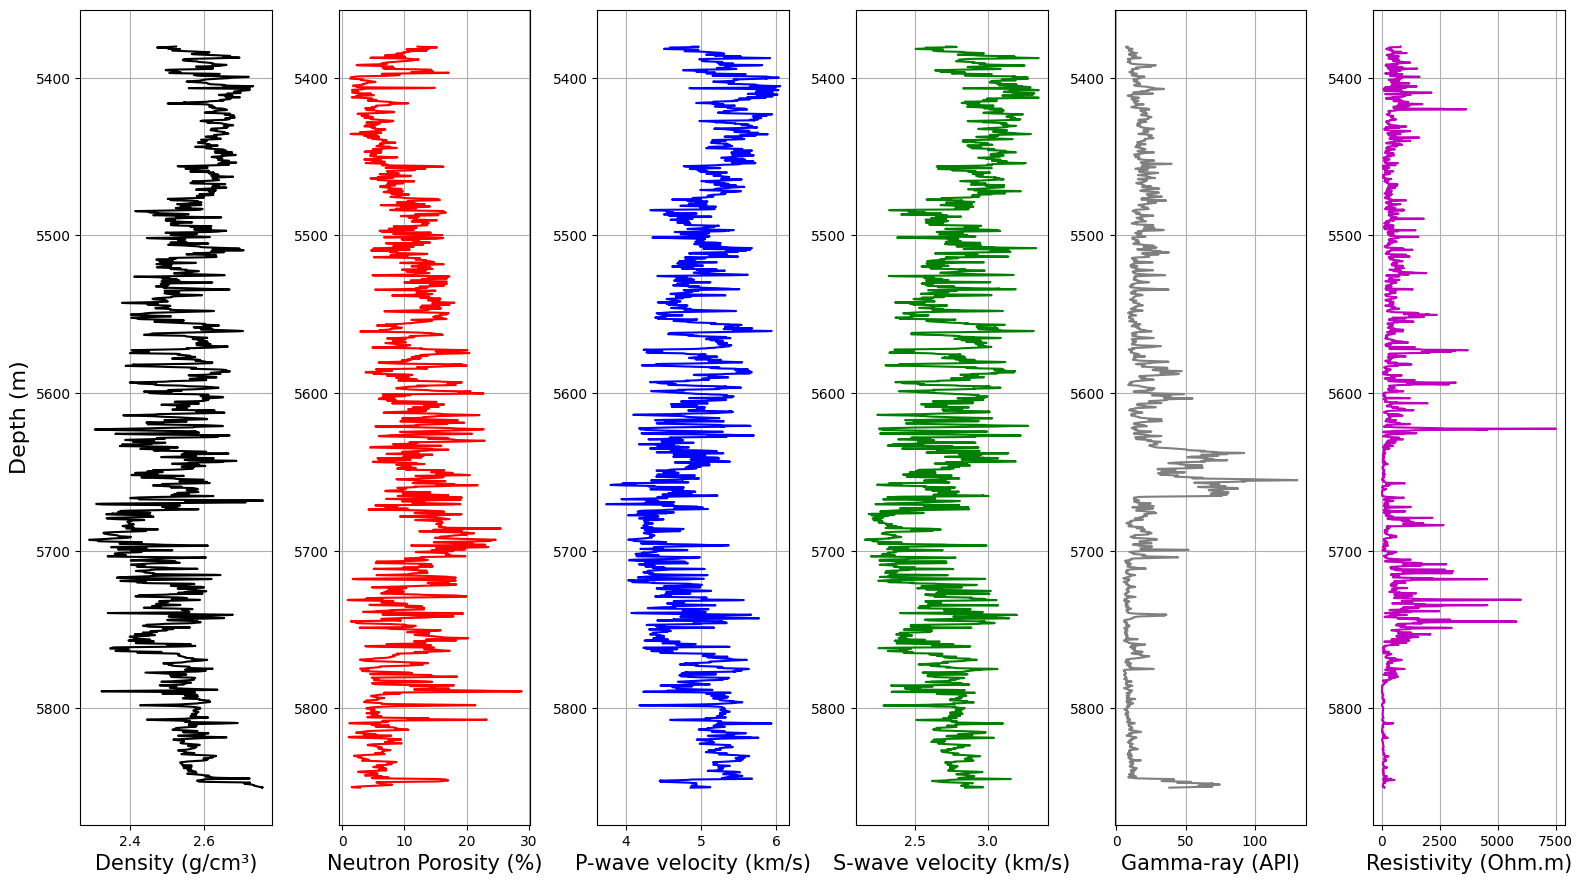

In [16]:
plt.figure(figsize=(16,9))

plt.subplot(1,6,1)
plt.plot(rho3,z3,'k')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('Density (g/cm³)', fontsize=15)
plt.ylabel('Depth (m)', fontsize=16)

plt.subplot(1,6,2)
plt.tight_layout()
plt.plot(phi3,z3,'r')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('Neutron Porosity (%)', fontsize=15)

plt.subplot(1,6,3)
plt.tight_layout()
plt.plot(vp3,z3,'b')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('P-wave velocity (km/s)', fontsize=15)

plt.subplot(1,6,4)
plt.tight_layout()
plt.plot(vs3,z3,'g')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('S-wave velocity (km/s)', fontsize=15)

plt.subplot(1,6,5)
plt.tight_layout()
plt.plot(gr3,z3,'gray')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('Gamma-ray (API)', fontsize=15)

plt.subplot(1,6,6)
plt.tight_layout()
plt.plot(res3,z3,'m')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('Resistivity (Ohm.m)', fontsize=15)
#plt.savefig('well3.png')

Text(0.5, 35.000000000000036, 'Resistivity (Ohm.m)')

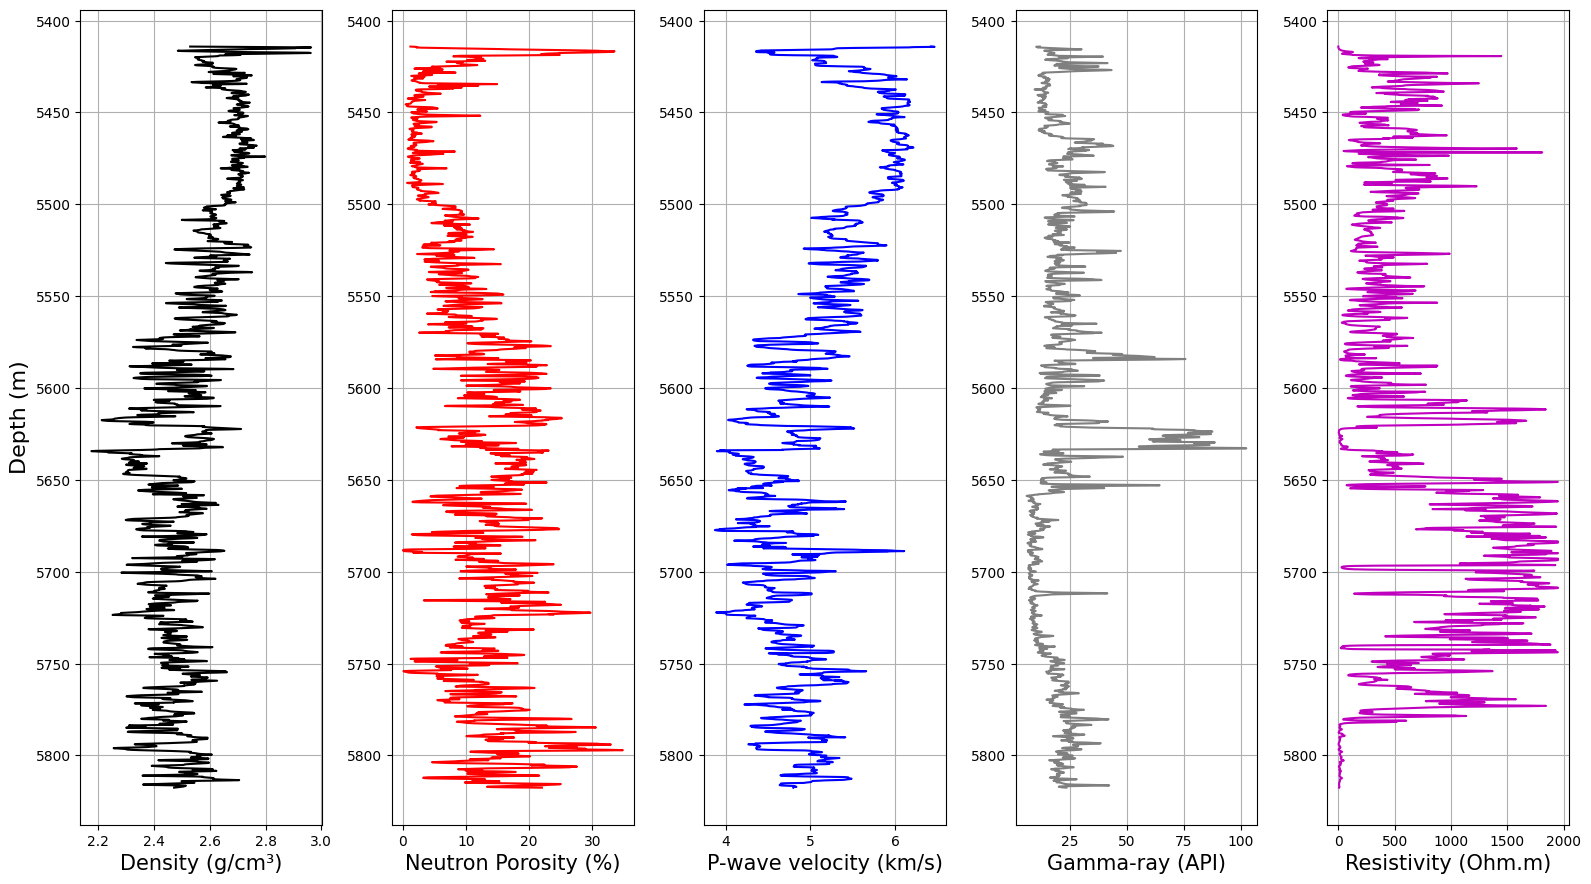

In [17]:
plt.figure(figsize=(16,9))

plt.subplot(1,5,1)
plt.plot(rho4,z4,'k')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('Density (g/cm³)', fontsize=15)
plt.ylabel('Depth (m)', fontsize=16)

plt.subplot(1,5,2)
plt.tight_layout()
plt.plot(phi4,z4,'r')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('Neutron Porosity (%)', fontsize=15)

plt.subplot(1,5,3)
plt.tight_layout()
plt.plot(vp4,z4,'b')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('P-wave velocity (km/s)', fontsize=15)


plt.subplot(1,5,4)
plt.tight_layout()
plt.plot(gr4,z4,'gray')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('Gamma-ray (API)', fontsize=15)

plt.subplot(1,5,5)
plt.tight_layout()
plt.plot(res4,z4,'m')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('Resistivity (Ohm.m)', fontsize=15)
#plt.savefig('well4.png')

Text(0.5, 35.000000000000036, 'Resistivity (Ohm.m)')

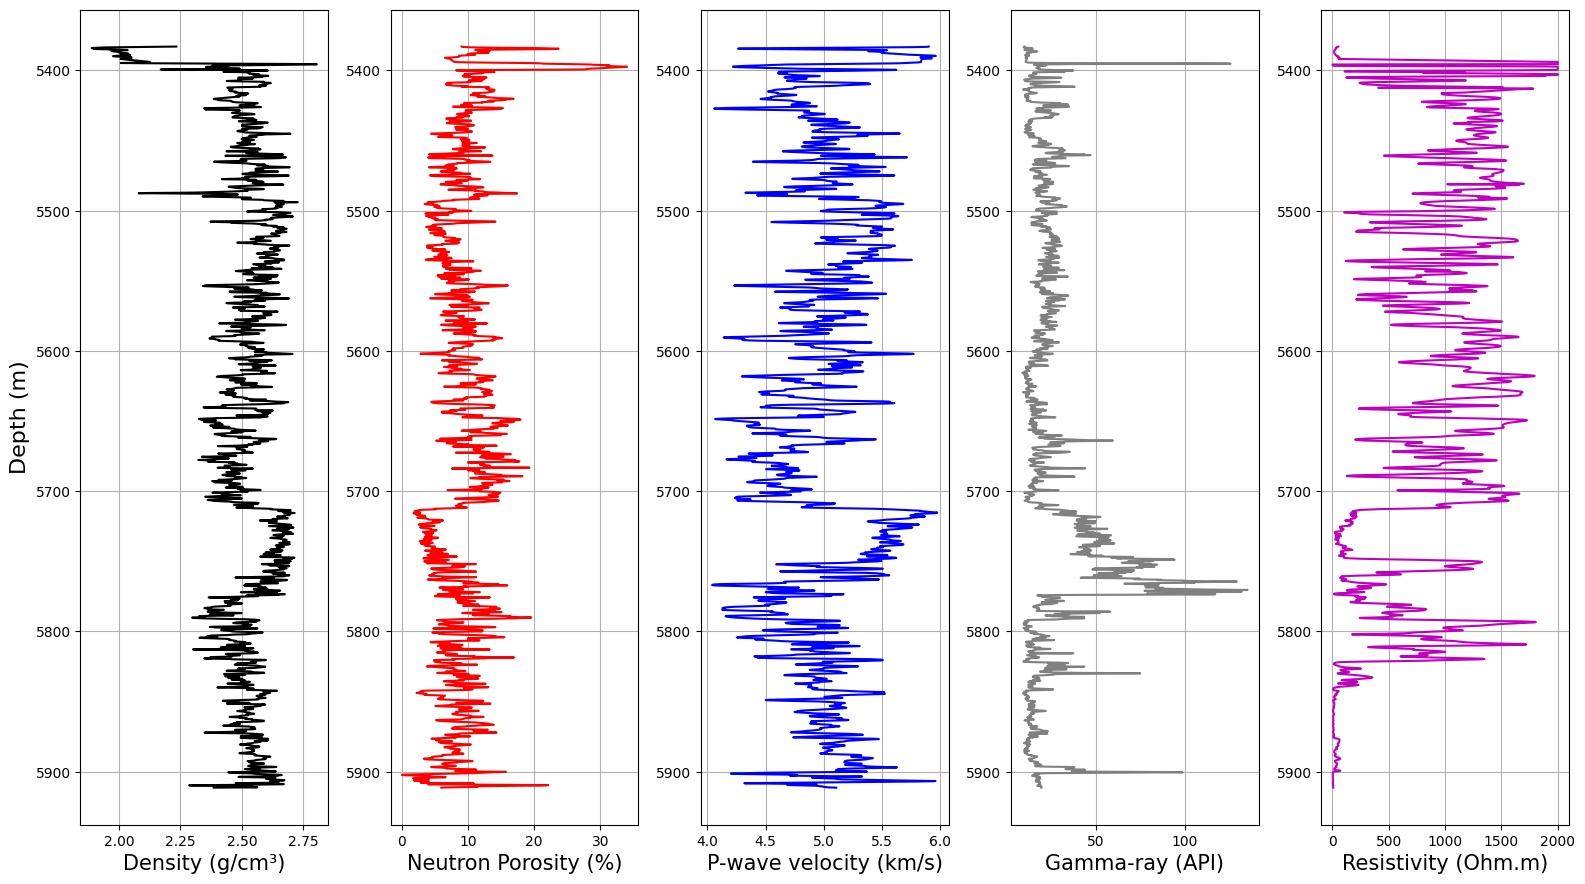

In [18]:
plt.figure(figsize=(16,9))

plt.subplot(1,5,1)
plt.plot(rho5,z5,'k')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('Density (g/cm³)', fontsize=15)
plt.ylabel('Depth (m)', fontsize=16)

plt.subplot(1,5,2)
plt.tight_layout()
plt.plot(phi5,z5,'r')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('Neutron Porosity (%)', fontsize=15)

plt.subplot(1,5,3)
plt.tight_layout()
plt.plot(vp5,z5,'b')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('P-wave velocity (km/s)', fontsize=15)


plt.subplot(1,5,4)
plt.tight_layout()
plt.plot(gr5,z5,'gray')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('Gamma-ray (API)', fontsize=15)

plt.subplot(1,5,5)
plt.tight_layout()
plt.plot(res5,z5,'m')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('Resistivity (Ohm.m)', fontsize=15)
#plt.savefig('well5.png')

Text(0.5, 35.000000000000036, 'Resistivity (Ohm.m)')

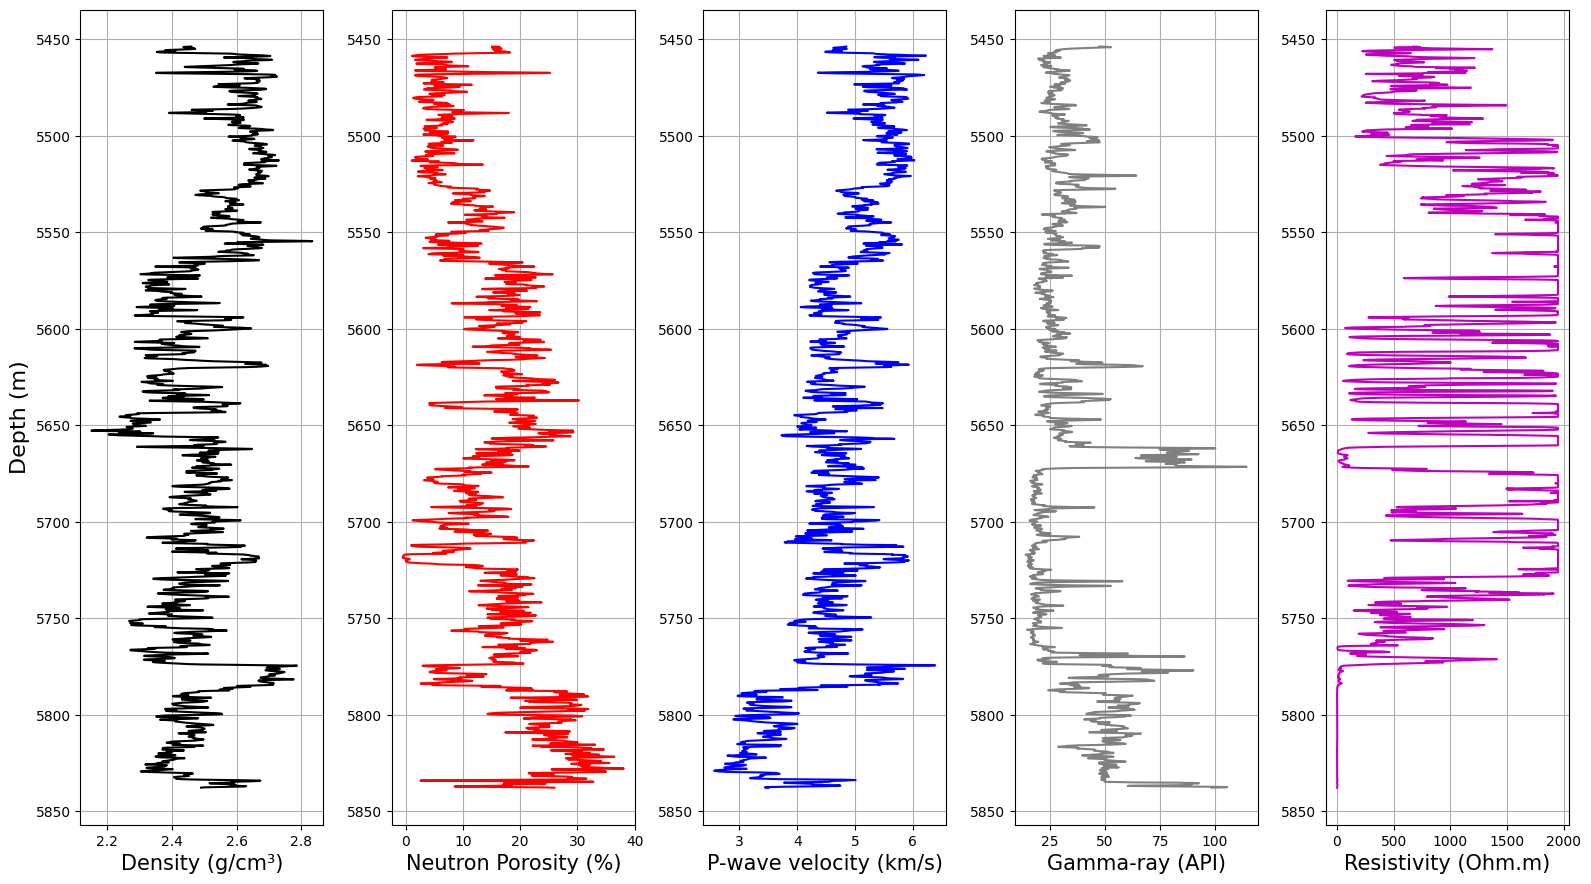

In [19]:
plt.figure(figsize=(16,9))

plt.subplot(1,5,1)
plt.plot(rho6,z6,'k')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('Density (g/cm³)', fontsize=15)
plt.ylabel('Depth (m)', fontsize=16)

plt.subplot(1,5,2)
plt.tight_layout()
plt.plot(phi6,z6,'r')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('Neutron Porosity (%)', fontsize=15)

plt.subplot(1,5,3)
plt.tight_layout()
plt.plot(vp6,z6,'b')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('P-wave velocity (km/s)', fontsize=15)


plt.subplot(1,5,4)
plt.tight_layout()
plt.plot(gr6,z6,'gray')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('Gamma-ray (API)', fontsize=15)

plt.subplot(1,5,5)
plt.tight_layout()
plt.plot(res6,z6,'m')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('Resistivity (Ohm.m)', fontsize=15)
#plt.savefig('well6.png')

Text(0.5, 35.000000000000036, 'Resistivity (Ohm.m)')

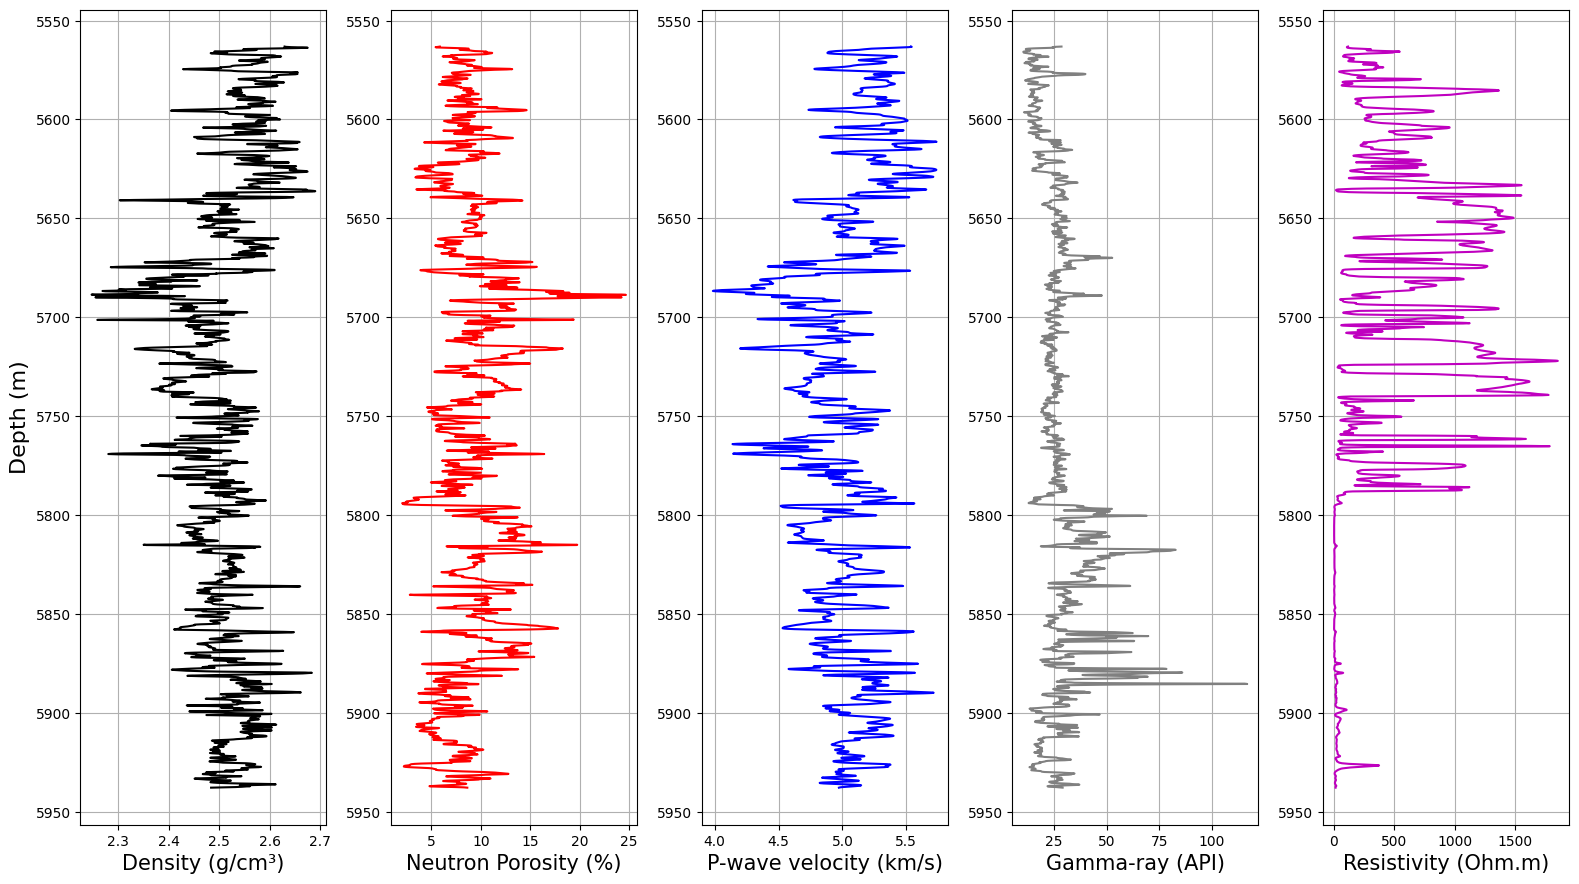

In [20]:
plt.figure(figsize=(16,9))

plt.subplot(1,5,1)
plt.plot(rho7,z7,'k')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('Density (g/cm³)', fontsize=15)
plt.ylabel('Depth (m)', fontsize=16)

plt.subplot(1,5,2)
plt.tight_layout()
plt.plot(phi7,z7,'r')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('Neutron Porosity (%)', fontsize=15)

plt.subplot(1,5,3)
plt.tight_layout()
plt.plot(vp7,z7,'b')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('P-wave velocity (km/s)', fontsize=15)


plt.subplot(1,5,4)
plt.tight_layout()
plt.plot(gr7,z7,'gray')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('Gamma-ray (API)', fontsize=15)

plt.subplot(1,5,5)
plt.tight_layout()
plt.plot(res7,z7,'m')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('Resistivity (Ohm.m)', fontsize=15)
#plt.savefig('well7.png')

Text(0.5, 35.000000000000036, 'Resistivity (Ohm.m)')

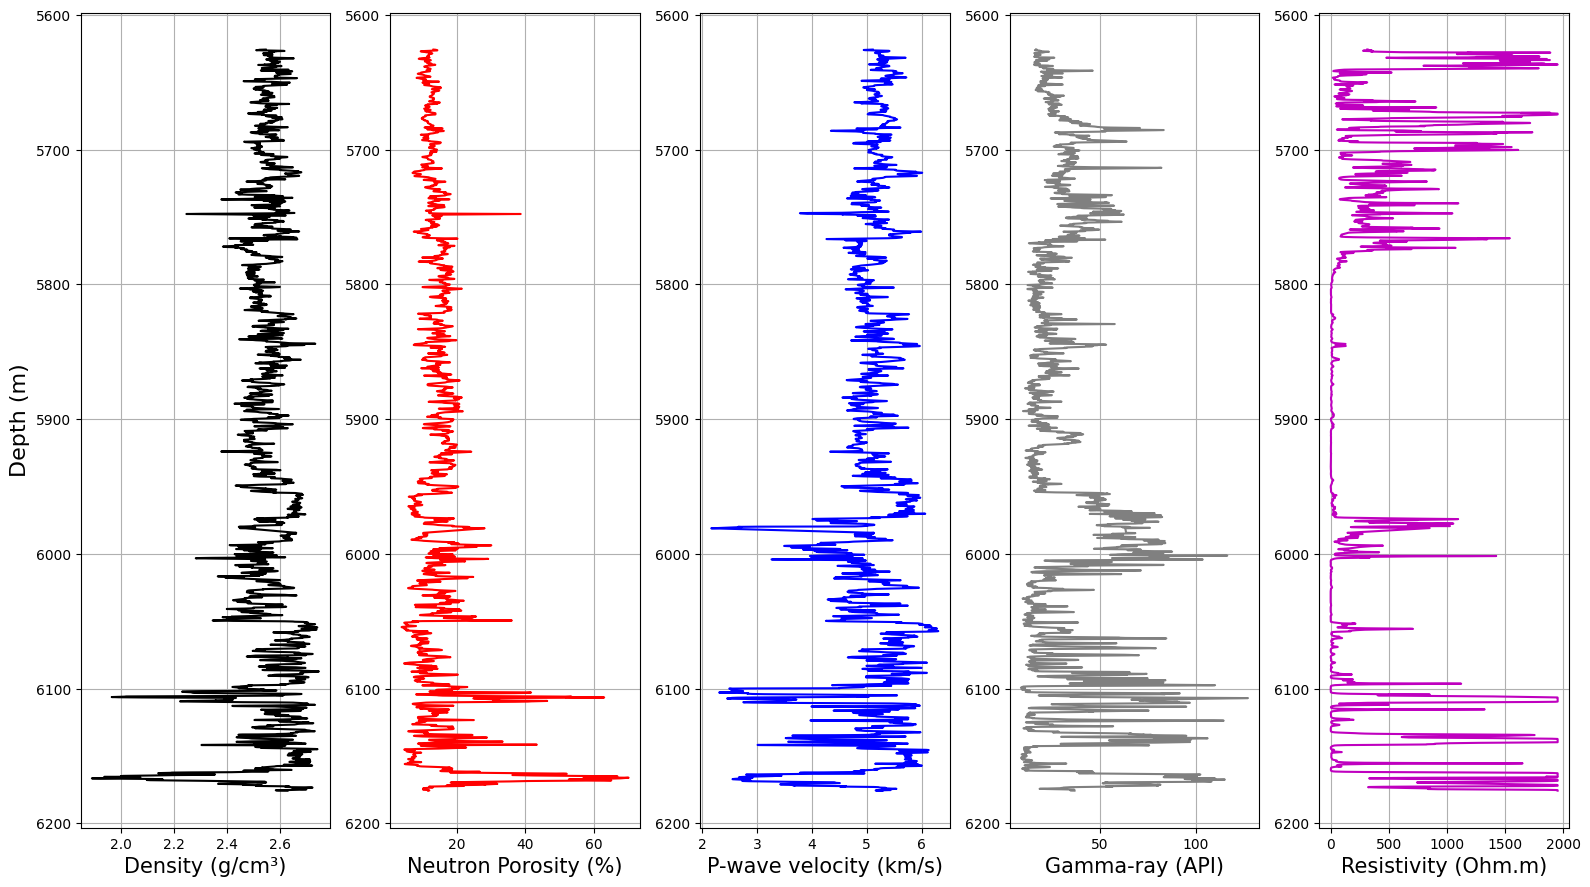

In [21]:
plt.figure(figsize=(16,9))

plt.subplot(1,5,1)
plt.plot(rho8,z8,'k')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('Density (g/cm³)', fontsize=15)
plt.ylabel('Depth (m)', fontsize=16)

plt.subplot(1,5,2)
plt.tight_layout()
plt.plot(phi8,z8,'r')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('Neutron Porosity (%)', fontsize=15)

plt.subplot(1,5,3)
plt.tight_layout()
plt.plot(vp8,z8,'b')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('P-wave velocity (km/s)', fontsize=15)


plt.subplot(1,5,4)
plt.tight_layout()
plt.plot(gr8,z8,'gray')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('Gamma-ray (API)', fontsize=15)

plt.subplot(1,5,5)
plt.tight_layout()
plt.plot(res8,z8,'m')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('Resistivity (Ohm.m)', fontsize=15)
#plt.savefig('well8.png')

Text(0.5, 35.000000000000036, 'Resistivity (Ohm.m)')

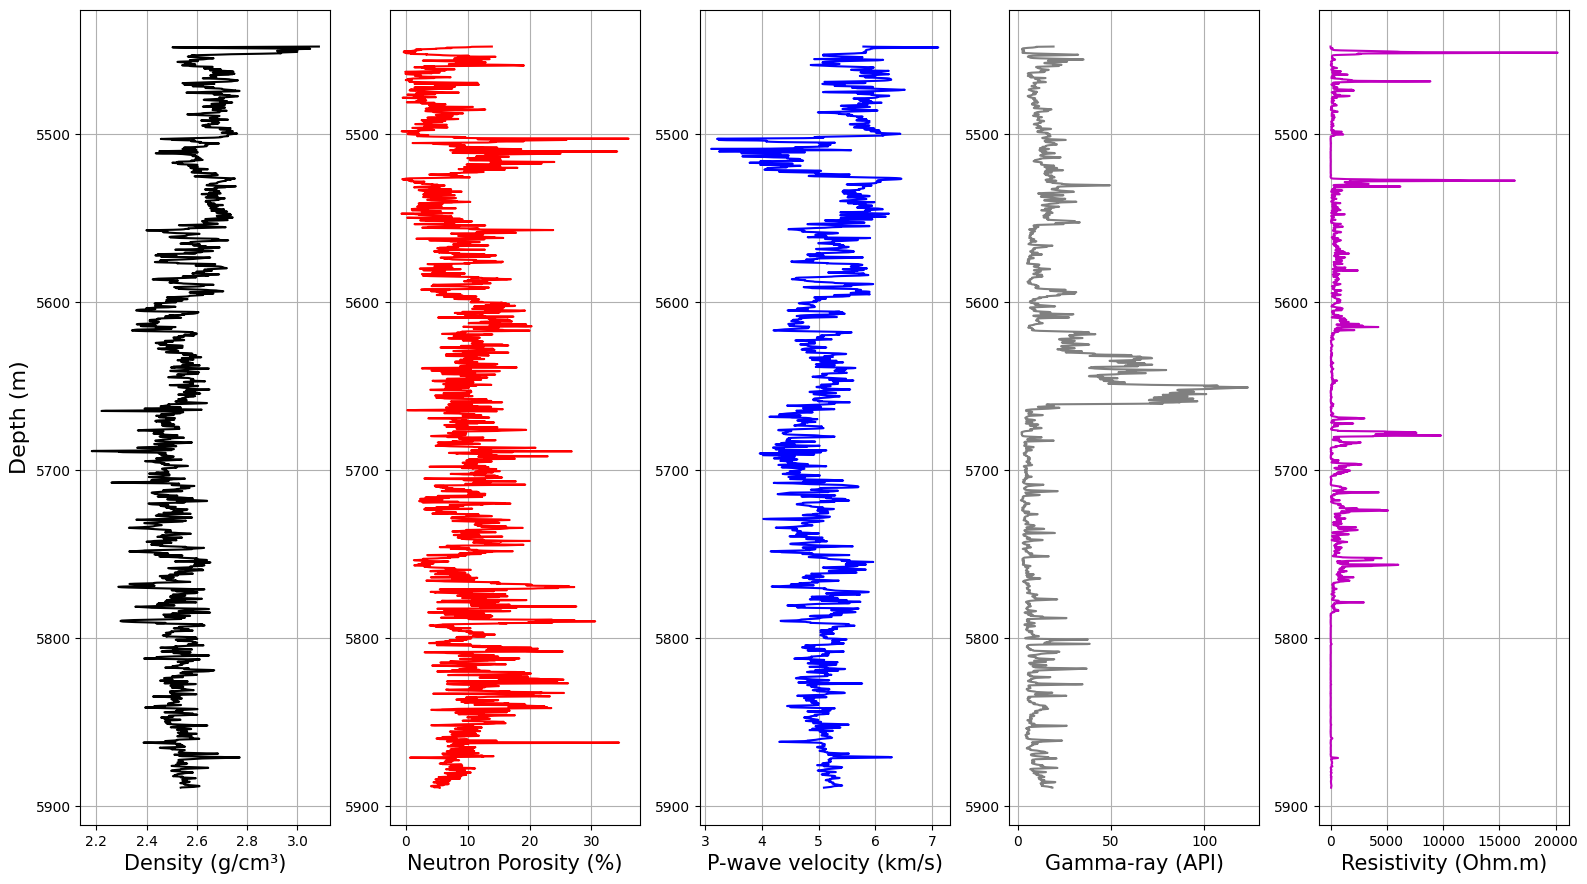

In [22]:
plt.figure(figsize=(16,9))

plt.subplot(1,5,1)
plt.plot(rho11,z11,'k')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('Density (g/cm³)', fontsize=15)
plt.ylabel('Depth (m)', fontsize=16)

plt.subplot(1,5,2)
plt.tight_layout()
plt.plot(phi11,z11,'r')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('Neutron Porosity (%)', fontsize=15)

plt.subplot(1,5,3)
plt.tight_layout()
plt.plot(vp11,z11,'b')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('P-wave velocity (km/s)', fontsize=15)


plt.subplot(1,5,4)
plt.tight_layout()
plt.plot(gr11,z11,'gray')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('Gamma-ray (API)', fontsize=15)

plt.subplot(1,5,5)
plt.tight_layout()
plt.plot(res11,z11,'m')
plt.grid()
#plt.ylim([5000, 5800])
plt.gca().invert_yaxis()
plt.xlabel('Resistivity (Ohm.m)', fontsize=15)
#plt.savefig('well11.png')

# Regressao usando MLP (Modelos 2, 6 e 10) #

In [23]:
#Separando os dados para treinamento e teste

array1 = np.array([gr,phi,rho]).T
array2 = np.array([gr2,phi2,rho2]).T
array3 = np.array([gr3,phi3,rho3]).T
array4 = np.array([gr4,phi4,rho4]).T
array5 = np.array([gr5,phi5,rho5]).T
array6 = np.array([gr6,phi6,rho6]).T
array7 = np.array([gr7,phi7,rho7]).T
array8 = np.array([gr8,phi8,rho8]).T
array9 = np.array([gr9,phi9,rho9]).T
array10 = np.array([gr10,phi10,rho10]).T
array11 = np.array([gr11,phi11,rho11]).T
array12 = np.array([gr12,phi12,rho12]).T
array13 = np.array([gr13,phi13,rho13]).T
array14 = np.array([gr14,phi14,rho14]).T
array15 = np.array([gr15,phi15,rho15]).T
array16 = np.array([gr16,phi16,rho16]).T
array18 = np.array([gr18,phi18,rho18]).T
array19 = np.array([gr19,phi19,rho19]).T
array20 = np.array([gr20,phi20,rho20]).T

x_data = np.concatenate([array1,array2,array3,array4,array5,array6,array7,array8,array9,array10,array11,array13,array14,array15,array16,array18,array19,array20])
y_data = np.concatenate([vp,vp2,vp3,vp4,vp5,vp6,vp7,vp8,vp9,vp10,vp11,vp13,vp14,vp15,vp16,vp18,vp19,vp20])

#y_data = np.reshape(y_data,(y_data.size,1))

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1)

# Utilizando o grid search para hyperparameter tuning #

In [24]:
# parametros = {'hidden_layer_sizes':[(100,),(50,2),(150,20),(200,),(70,30)],'activation':['identity', 'logistic', 'tanh', 'relu'],'solver':['adam'],'learning_rate':['constant', 'adaptive']}

# lr_est = MLPRegressor()

# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid = GridSearchCV(estimator = lr_est,param_grid = parametros, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv)  

# #Treinando a rede 
# regr = grid.fit(X_train, y_train)

# # summarize result
# print('Best Score: %s' % regr.best_score_)
# print('Best Hyperparameters: %s' % regr.best_params_)

In [25]:
#Best Score: -0.09744637507850509
#Best Hyperparameters: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}

In [26]:
regr = MLPRegressor(activation='tanh',learning_rate='constant',random_state=1, max_iter=10000).fit(X_train, y_train)

In [27]:
#Estimando com random forest regressor

regr2 = RandomForestRegressor(max_depth=2, random_state=0).fit(X_train, y_train)

In [28]:
#Estimando com gradient boosting regressor

regr3 = GradientBoostingRegressor(random_state=0).fit(X_train, y_train)

# Salvando os modelos #

In [29]:
with open('regr_modelo2.pkl','wb') as f:
    pickle.dump(regr,f)
    
with open('regr_modelo6.pkl','wb') as f:
    pickle.dump(regr2,f)
    
with open('regr_modelo10.pkl','wb') as f:
    pickle.dump(regr3,f)

# Carregando os modelos #

In [30]:
with open('regr_modelo2.pkl', 'rb') as f:
    reg2 = pickle.load(f)
    
with open('regr_modelo6.pkl', 'rb') as f:
    reg6 = pickle.load(f)
    
with open('regr_modelo10.pkl', 'rb') as f:
    reg10 = pickle.load(f)

# Metricas para treinamento e teste #

In [31]:
print('Treinamento (MLP, RF, GB):')
print(regr.score(X_train,y_train),regr2.score(X_train,y_train),regr3.score(X_train,y_train))

print('Teste (MLP, RF, GB):')
print(regr.score(X_test,y_test),regr2.score(X_test,y_test),regr3.score(X_test,y_test))

Treinamento (MLP, RF, GB):
0.6732721878873542 0.572108354997189 0.7390235896007599
Teste (MLP, RF, GB):
0.6605502060008777 0.5682584375279581 0.7159218021733762


In [32]:
#Estimando vp para o dado teste
y_pred = regr.predict(X_test)
y_pred2 = regr2.predict(X_test)
y_pred3 = regr3.predict(X_test)

In [33]:
MSE = np.square(np.subtract(y_pred,y_test)).mean()
MSE1 = np.square(y_test).mean()
RMSE = math.sqrt(MSE)
print('RMSE for test data (MLP Regressor-modelo 2): '+str(RMSE))

MSE = np.square(np.subtract(y_pred2,y_test)).mean()
MSE1 = np.square(y_test).mean()
RMSE = math.sqrt(MSE)
print('RMSE for test data (RF Regressor-modelo 6): '+str(RMSE))

MSE = np.square(np.subtract(y_pred3,y_test)).mean()
MSE1 = np.square(y_test).mean()
RMSE = math.sqrt(MSE)
print('RMSE for test data (GB Regressor-modelo 10): '+str(RMSE))

RMSE for test data (MLP Regressor-modelo 2): 0.3025767166194647
RMSE for test data (RF Regressor-modelo 6): 0.34123978573615027
RMSE for test data (GB Regressor-modelo 10): 0.2768003807811559


In [34]:
#Estimando vp para o dado train
y_predt = regr.predict(X_train)
y_predt2 = regr2.predict(X_train)
y_predt3 = regr3.predict(X_train)

In [35]:
MSE = np.square(np.subtract(y_predt,y_train)).mean()
MSE1 = np.square(y_train).mean()
RMSE = math.sqrt(MSE)
print('RMSE for train data (MLP Regressor-modelo 2): '+str(RMSE))

MSE = np.square(np.subtract(y_predt2,y_train)).mean()
MSE1 = np.square(y_train).mean()
RMSE = math.sqrt(MSE)
print('RMSE for train data (RF Regressor-modelo 6): '+str(RMSE))

MSE = np.square(np.subtract(y_predt3,y_train)).mean()
MSE1 = np.square(y_train).mean()
RMSE = math.sqrt(MSE)
print('RMSE for train data (GB Regressor-modelo 10): '+str(RMSE))

RMSE for train data (MLP Regressor-modelo 2): 0.30591143132418924
RMSE for train data (RF Regressor-modelo 6): 0.3500818191119966
RMSE for train data (GB Regressor-modelo 10): 0.2734030029748326


In [36]:
print('PEARSON for test data (MLP Regressor-modelo 2): '+str(np.corrcoef(y_pred,y_test)[0][1]))
print('PEARSON for test data (RF Regressor-modelo 6): '+str(np.corrcoef(y_pred2,y_test)[0][1]))
print('PEARSON for test data (GB Regressor-modelo 10): '+str(np.corrcoef(y_pred3,y_test)[0][1]))

print('PEARSON for train data (MLP Regressor-modelo 2): '+str(np.corrcoef(y_predt,y_train)[0][1]))
print('PEARSON for train data (RF Regressor-modelo 6): '+str(np.corrcoef(y_predt2,y_train)[0][1]))
print('PEARSON for train data (GB Regressor-modelo 10): '+str(np.corrcoef(y_predt3,y_train)[0][1]))

PEARSON for test data (MLP Regressor-modelo 2): 0.8188613998028049
PEARSON for test data (RF Regressor-modelo 6): 0.7541304705106592
PEARSON for test data (GB Regressor-modelo 10): 0.8462031953170334
PEARSON for train data (MLP Regressor-modelo 2): 0.8265151577807767
PEARSON for train data (RF Regressor-modelo 6): 0.7573839833344173
PEARSON for train data (GB Regressor-modelo 10): 0.8597762342114333


# Testes cegos #

In [37]:


y_pred_blind = regr.predict(array12)

Text(0, 0.5, 'Depth (m)')

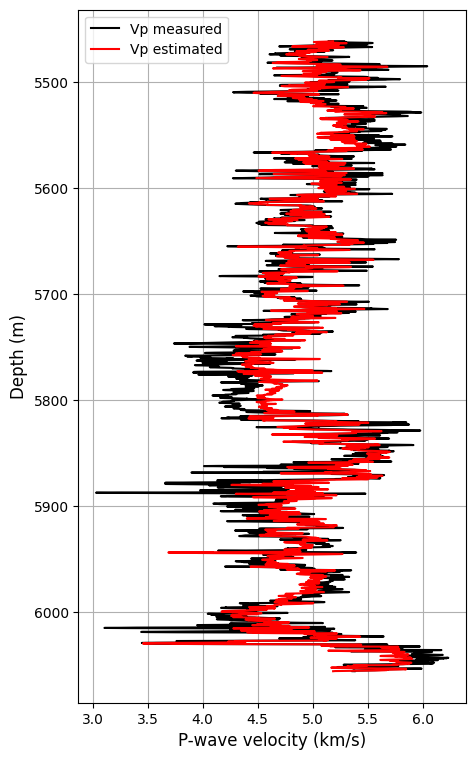

In [38]:
plt.figure(figsize=(5,9))
plt.plot(vp12,z12,'-k',y_pred_blind,z12,'-r')
plt.gca().invert_yaxis()
plt.grid()
plt.legend(('Vp measured','Vp estimated'))
plt.xlabel('P-wave velocity (km/s)', fontsize='large')
plt.ylabel('Depth (m)', fontsize='large')
#plt.savefig('result_vp_sklearn_mlpregressor.png')

In [39]:
vp_meas = vp12

np.corrcoef(vp_meas,y_pred_blind)

array([[1.        , 0.83935785],
       [0.83935785, 1.        ]])

In [40]:
MSE = np.square(np.subtract(y_pred_blind,vp_meas)).mean()
MSE1 = np.square(vp_meas).mean()
RMSE = math.sqrt(MSE)
print(RMSE)

0.2695361527148152


Text(0.5, 0, 'Absolute error')

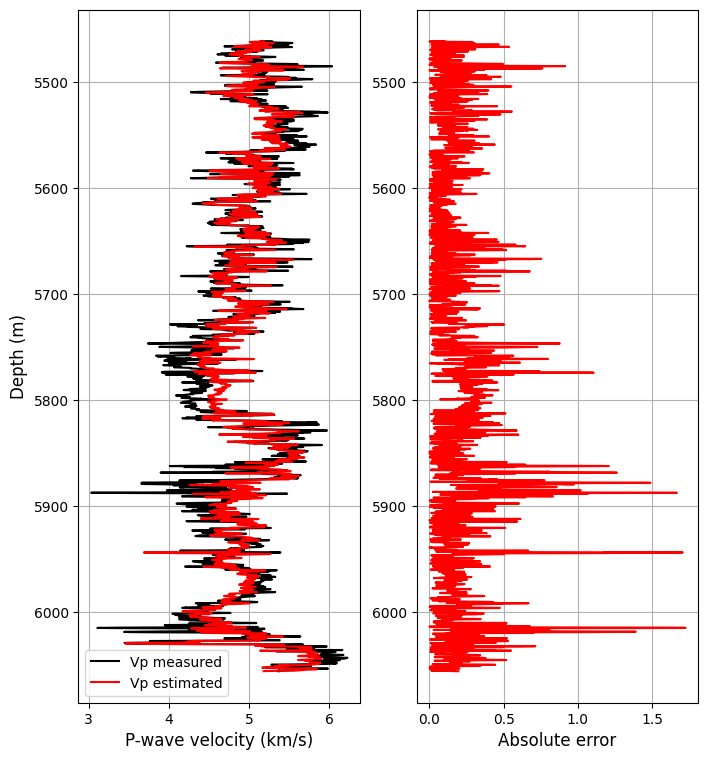

In [41]:
plt.figure(figsize=(8,9))
plt.subplot(1,2,1)
plt.plot(vp12,z12,'-k',y_pred_blind,z12,'-r')
plt.gca().invert_yaxis()
plt.grid()
plt.legend(('Vp measured','Vp estimated'))
plt.xlabel('P-wave velocity (km/s)', fontsize='large')
plt.ylabel('Depth (m)', fontsize='large')

plt.subplot(1,2,2)
plt.plot(np.abs(vp12-y_pred_blind),z12,'-r')
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel('Absolute error', fontsize='large')
#plt.savefig('result_vp_sklearn_mlpregressor.png')

In [42]:
vp_meas = vp12

np.corrcoef(vp_meas,y_pred_blind)

array([[1.        , 0.83935785],
       [0.83935785, 1.        ]])

In [43]:
MSE = np.square(np.subtract(y_pred_blind,vp_meas)).mean()
MSE1 = np.square(vp_meas).mean()
RMSE = math.sqrt(MSE)
print(RMSE)

0.2695361527148152


In [44]:
y_pred_gardner = (rho12/1.74)**4

Text(0.5, 0, 'Absolute error')

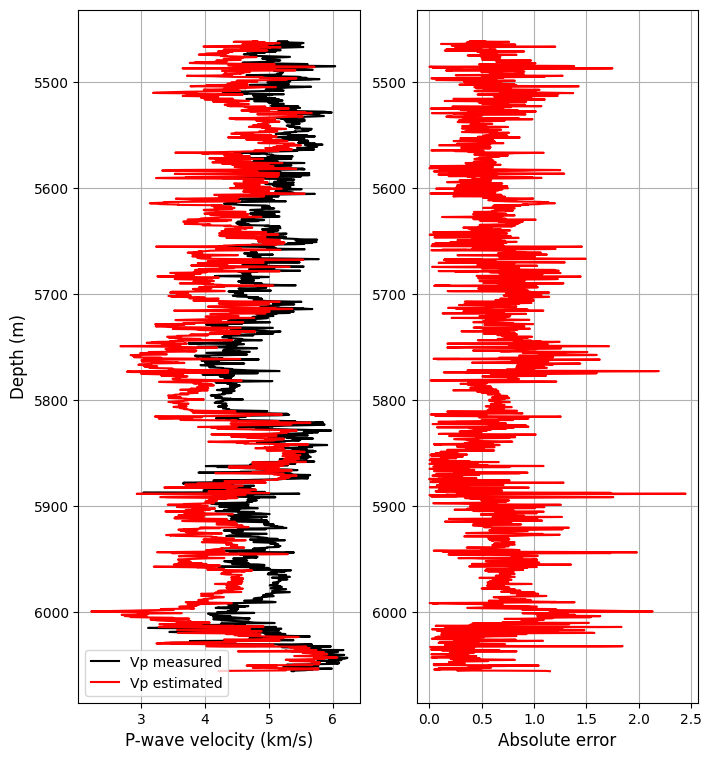

In [45]:
plt.figure(figsize=(8,9))
plt.subplot(1,2,1)
plt.plot(vp12,z12,'-k',y_pred_gardner,z12,'-r')
plt.gca().invert_yaxis()
plt.grid()
plt.legend(('Vp measured','Vp estimated'))
plt.xlabel('P-wave velocity (km/s)', fontsize='large')
plt.ylabel('Depth (m)', fontsize='large')

plt.subplot(1,2,2)
plt.plot(np.abs(vp12-y_pred_gardner),z12,'-r')
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel('Absolute error', fontsize='large')
#plt.savefig('result_vp_gardner.png')

In [46]:
np.corrcoef(vp_meas,y_pred_gardner)

array([[1.        , 0.80517994],
       [0.80517994, 1.        ]])

In [47]:
MSE = np.square(np.subtract(y_pred_gardner,vp_meas)).mean()
MSE1 = np.square(vp_meas).mean()
RMSE = math.sqrt(MSE)
print(RMSE)

0.7061156870746894


In [48]:
array17 = np.array([gr17,phi17,rho17]).T

vp_pred_blind_17 = regr.predict(array17)

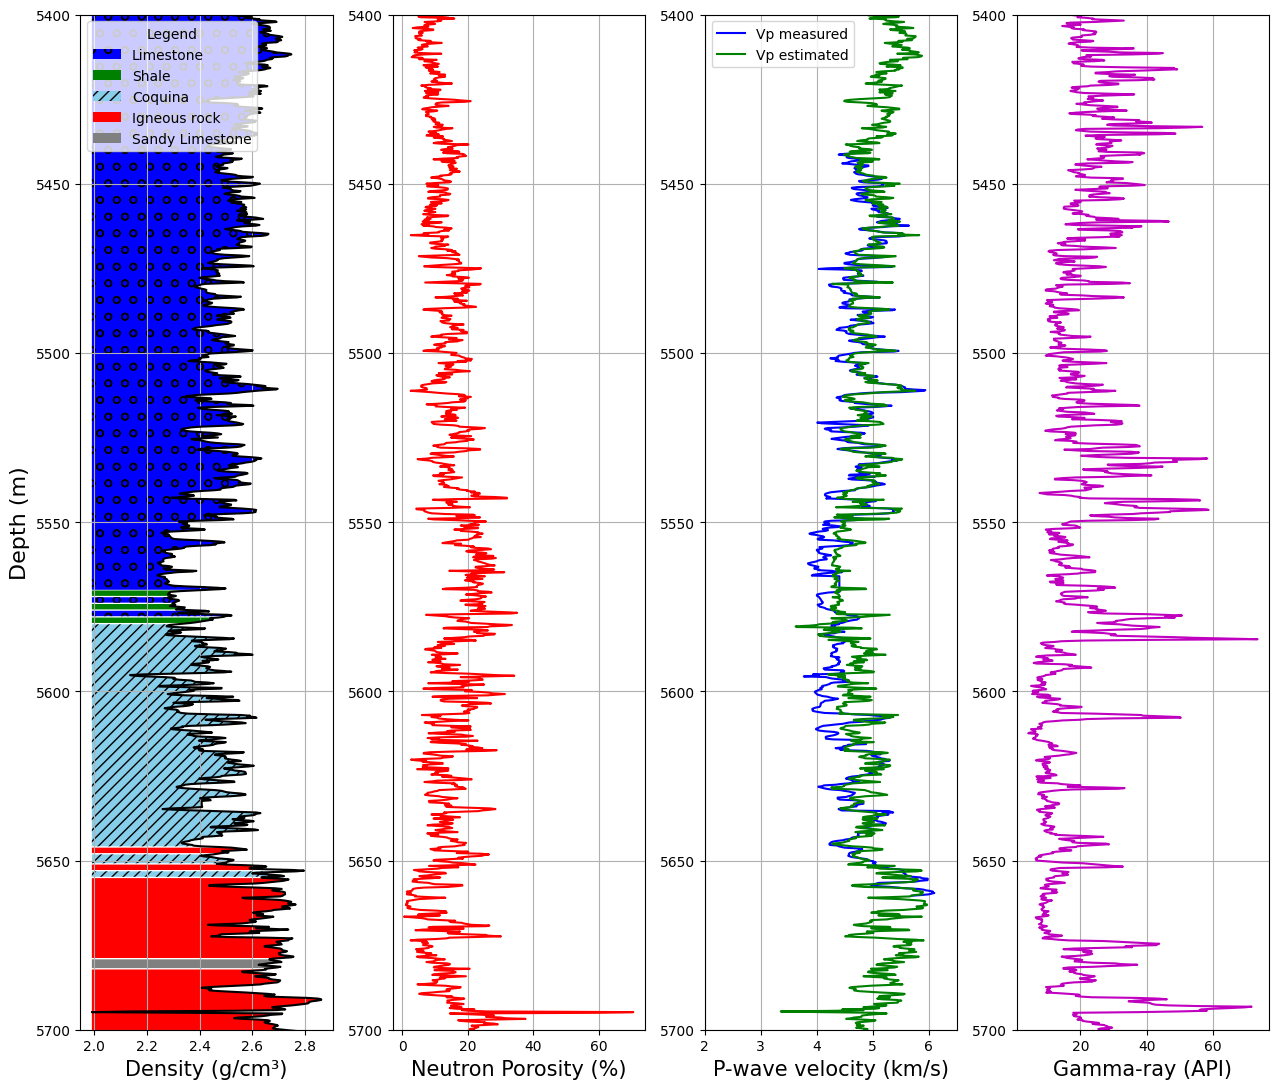

In [49]:
plt.figure(figsize=(13,11))

plt.subplot(1,4,1)
plt.plot(rho17,z17,'k')
plt.fill_betweenx(z17, rho17, min(rho17), where = z17 <= 5570, facecolor='b',hatch='o', label='Limestone')
plt.fill_betweenx(z17, rho17, min(rho17), where = (z17 > 5570) & (z17 < 5572), facecolor='g', label='Shale')
plt.fill_betweenx(z17, rho17, min(rho17), where = (z17 > 5572) & (z17 < 5574), facecolor='b',hatch='o')
plt.fill_betweenx(z17, rho17, min(rho17), where = (z17 > 5574) & (z17 < 5576), facecolor='g')
plt.fill_betweenx(z17, rho17, min(rho17), where = (z17 > 5576) & (z17 < 5578), facecolor='b',hatch='o')
plt.fill_betweenx(z17, rho17, min(rho17), where = (z17 > 5578) & (z17 < 5580), facecolor='g')
plt.fill_betweenx(z17, rho17, min(rho17), where = (z17 > 5580) & (z17 < 5646), facecolor='skyblue',hatch='///', label='Coquina')
plt.fill_betweenx(z17, rho17, min(rho17), where = (z17 > 5646) & (z17 < 5648), facecolor='r', label='Igneous rock')
plt.fill_betweenx(z17, rho17, min(rho17), where = (z17 > 5648) & (z17 < 5651), facecolor='skyblue',hatch='///')
plt.fill_betweenx(z17, rho17, min(rho17), where = (z17 > 5651) & (z17 < 5653), facecolor='r')
plt.fill_betweenx(z17, rho17, min(rho17), where = (z17 > 5653) & (z17 < 5655), facecolor='skyblue',hatch='///')
plt.fill_betweenx(z17, rho17, min(rho17), where = (z17 > 5655) & (z17 < 5679), facecolor='r')
plt.fill_betweenx(z17, rho17, min(rho17), where = (z17 > 5679) & (z17 < 5682), facecolor='gray', label='Sandy Limestone')
plt.fill_betweenx(z17, rho17, min(rho17), where = z17 > 5682, facecolor='r')
plt.grid()
#plt.legend(('','Limestone','Shale','Limestone','Shale','Limestone','Shale','Coquina','Igneous rocks','Coquina','Igneous rocks','Coquina','Igneous rocks','Sandy limestone','Igneous rock'))
plt.legend(loc='upper left', title='Legend')
plt.ylim([5400, 5700])
plt.gca().invert_yaxis()
plt.xlabel('Density (g/cm³)', fontsize=15)
plt.ylabel('Depth (m)', fontsize=16)

plt.subplot(1,4,2)
plt.tight_layout()
plt.plot(phi17,z17,'r')
plt.grid()
plt.ylim([5400, 5700])
plt.gca().invert_yaxis()
plt.xlabel('Neutron Porosity (%)', fontsize=15)

plt.subplot(1,4,3)
plt.tight_layout()
plt.plot(vp17,z17_vp,'b',vp_pred_blind_17,z17,'g')
plt.legend(('Vp measured','Vp estimated'))
plt.grid()
plt.ylim([5400, 5700])
plt.xlim([2, 6.5])
plt.gca().invert_yaxis()
plt.xlabel('P-wave velocity (km/s)', fontsize=15)

plt.subplot(1,4,4)
plt.tight_layout()
plt.plot(gr17,z17,'m')
plt.grid()
plt.ylim([5400, 5700])
plt.gca().invert_yaxis()
plt.xlabel('Gamma-ray (API)', fontsize=15)


plt.savefig('well17_complete.png')

# Calculando o coeficiente de correlacao e o RMSE (5450 - 5650) #

In [50]:
np.corrcoef(vp17,vp_pred_blind_17[+250:-220])

array([[1.        , 0.83562508],
       [0.83562508, 1.        ]])

In [51]:
MSE = np.square(np.subtract(vp17,vp_pred_blind_17[+250:-220])).mean()
MSE1 = np.square(vp17).mean()
RMSE = math.sqrt(MSE)
print(RMSE)

0.26417167826371696


# Predicao Gardner #

In [52]:
#Prediction Gardner

vp_pred_blind_17_gard = (rho17/1.74)**4

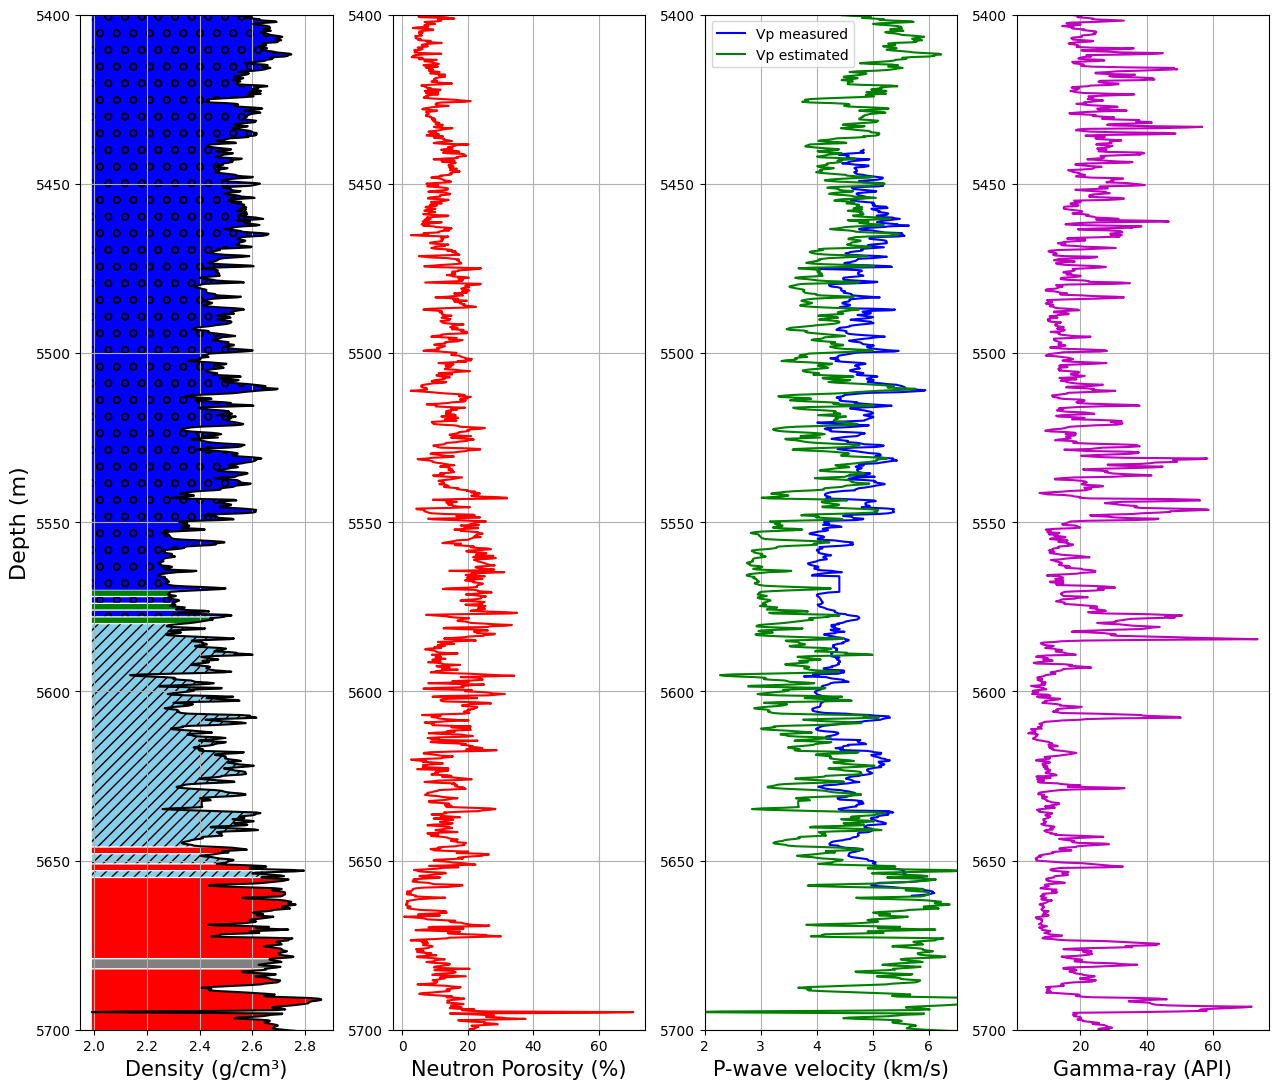

In [53]:
plt.figure(figsize=(13,11))

plt.subplot(1,4,1)
plt.plot(rho17,z17,'k')
plt.fill_betweenx(z17, rho17, min(rho17), where = z17 <= 5570, facecolor='b',hatch='o')
plt.fill_betweenx(z17, rho17, min(rho17), where = (z17 > 5570) & (z17 < 5572), facecolor='g')
plt.fill_betweenx(z17, rho17, min(rho17), where = (z17 > 5572) & (z17 < 5574), facecolor='b',hatch='o')
plt.fill_betweenx(z17, rho17, min(rho17), where = (z17 > 5574) & (z17 < 5576), facecolor='g')
plt.fill_betweenx(z17, rho17, min(rho17), where = (z17 > 5576) & (z17 < 5578), facecolor='b',hatch='o')
plt.fill_betweenx(z17, rho17, min(rho17), where = (z17 > 5578) & (z17 < 5580), facecolor='g')
plt.fill_betweenx(z17, rho17, min(rho17), where = (z17 > 5580) & (z17 < 5646), facecolor='skyblue',hatch='///')
plt.fill_betweenx(z17, rho17, min(rho17), where = (z17 > 5646) & (z17 < 5648), facecolor='r')
plt.fill_betweenx(z17, rho17, min(rho17), where = (z17 > 5648) & (z17 < 5651), facecolor='skyblue',hatch='///')
plt.fill_betweenx(z17, rho17, min(rho17), where = (z17 > 5651) & (z17 < 5653), facecolor='r')
plt.fill_betweenx(z17, rho17, min(rho17), where = (z17 > 5653) & (z17 < 5655), facecolor='skyblue',hatch='///')
plt.fill_betweenx(z17, rho17, min(rho17), where = (z17 > 5655) & (z17 < 5679), facecolor='r')
plt.fill_betweenx(z17, rho17, min(rho17), where = (z17 > 5679) & (z17 < 5682), facecolor='gray')
plt.fill_betweenx(z17, rho17, min(rho17), where = z17 > 5682, facecolor='r')
plt.grid()
plt.ylim([5400, 5700])
plt.gca().invert_yaxis()
plt.xlabel('Density (g/cm³)', fontsize=15)
plt.ylabel('Depth (m)', fontsize=16)

plt.subplot(1,4,2)
plt.tight_layout()
plt.plot(phi17,z17,'r')
plt.grid()
plt.ylim([5400, 5700])
plt.gca().invert_yaxis()
plt.xlabel('Neutron Porosity (%)', fontsize=15)

plt.subplot(1,4,3)
plt.tight_layout()
plt.plot(vp17,z17_vp,'b',vp_pred_blind_17_gard,z17,'g')
plt.legend(('Vp measured','Vp estimated'))
plt.grid()
plt.ylim([5400, 5700])
plt.xlim([2, 6.5])
plt.gca().invert_yaxis()
plt.xlabel('P-wave velocity (km/s)', fontsize=15)

plt.subplot(1,4,4)
plt.tight_layout()
plt.plot(gr17,z17,'m')
plt.grid()
plt.ylim([5400, 5700])
plt.gca().invert_yaxis()
plt.xlabel('Gamma-ray (API)', fontsize=15)

#plt.subplot(1,5,5)
#plt.tight_layout()
#plt.plot(res20,z20,'m')
#plt.grid()
#plt.ylim([5350, 5800])
#plt.gca().invert_yaxis()
#plt.xlabel('Resistivity (Ohm.m)', fontsize=15)
plt.savefig('well17_complete_gardner.png')

In [54]:
np.corrcoef(vp17,vp_pred_blind_17_gard[+250:-220])

array([[1.        , 0.87955298],
       [0.87955298, 1.        ]])

In [55]:
MSE = np.square(np.subtract(vp17,vp_pred_blind_17_gard[+250:-220])).mean()
MSE1 = np.square(vp17).mean()
RMSE = math.sqrt(MSE)
print(RMSE)

0.7186973568000637


# Predicao Gradient Boosting #

In [56]:
array17 = np.array([gr17,phi17,rho17]).T

vp_pred_blind_17_gb = regr3.predict(array17)

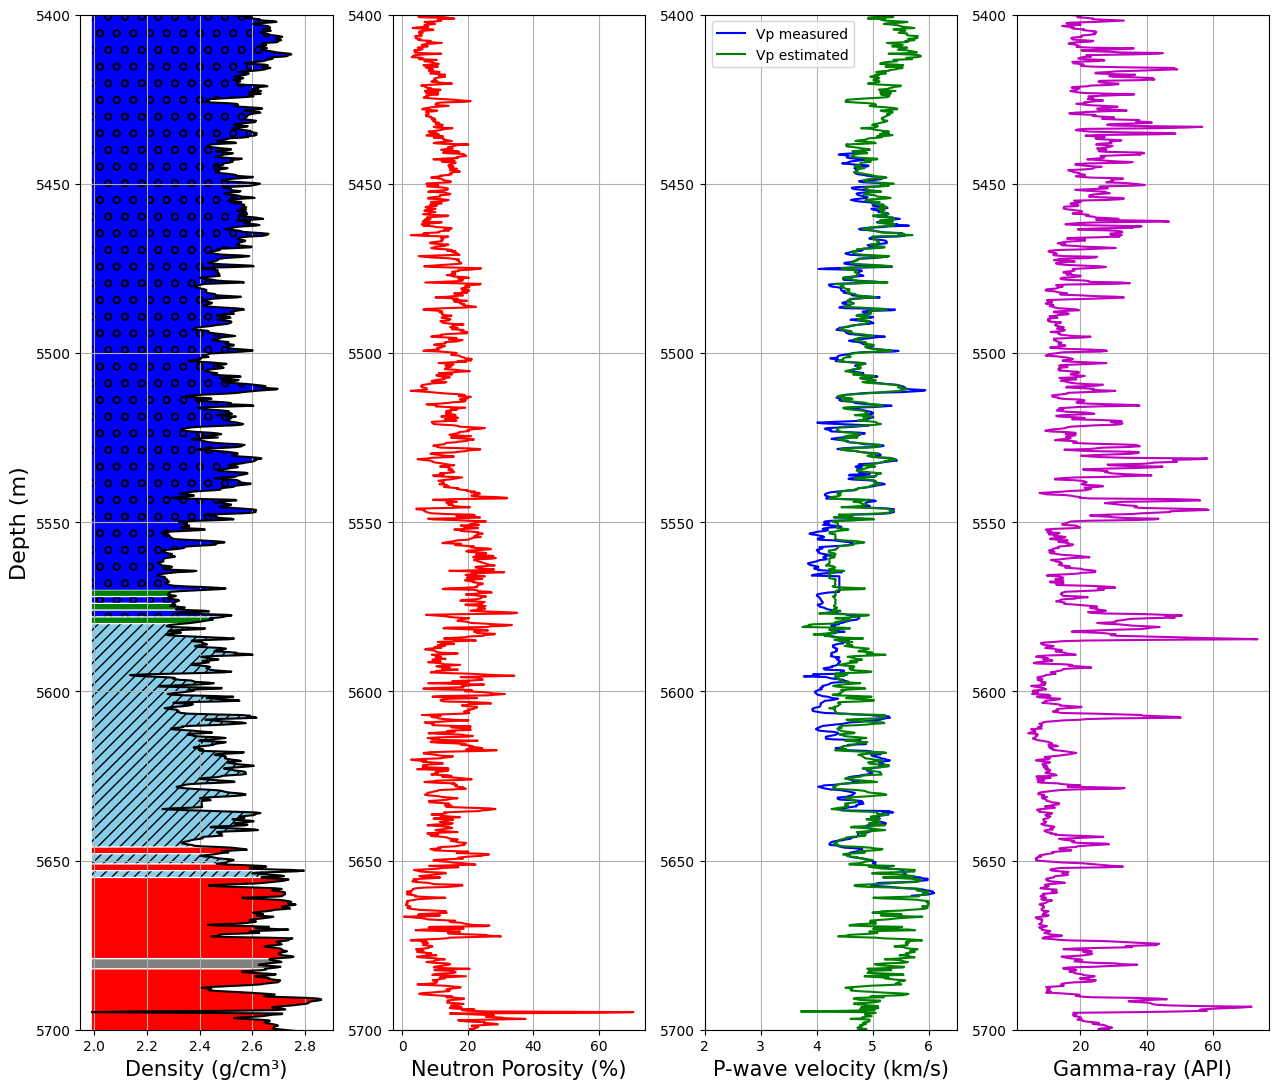

In [57]:
plt.figure(figsize=(13,11))

plt.subplot(1,4,1)
plt.plot(rho17,z17,'k')
plt.fill_betweenx(z17, rho17, min(rho17), where = z17 <= 5570, facecolor='b',hatch='o')
plt.fill_betweenx(z17, rho17, min(rho17), where = (z17 > 5570) & (z17 < 5572), facecolor='g')
plt.fill_betweenx(z17, rho17, min(rho17), where = (z17 > 5572) & (z17 < 5574), facecolor='b',hatch='o')
plt.fill_betweenx(z17, rho17, min(rho17), where = (z17 > 5574) & (z17 < 5576), facecolor='g')
plt.fill_betweenx(z17, rho17, min(rho17), where = (z17 > 5576) & (z17 < 5578), facecolor='b',hatch='o')
plt.fill_betweenx(z17, rho17, min(rho17), where = (z17 > 5578) & (z17 < 5580), facecolor='g')
plt.fill_betweenx(z17, rho17, min(rho17), where = (z17 > 5580) & (z17 < 5646), facecolor='skyblue',hatch='///')
plt.fill_betweenx(z17, rho17, min(rho17), where = (z17 > 5646) & (z17 < 5648), facecolor='r')
plt.fill_betweenx(z17, rho17, min(rho17), where = (z17 > 5648) & (z17 < 5651), facecolor='skyblue',hatch='///')
plt.fill_betweenx(z17, rho17, min(rho17), where = (z17 > 5651) & (z17 < 5653), facecolor='r')
plt.fill_betweenx(z17, rho17, min(rho17), where = (z17 > 5653) & (z17 < 5655), facecolor='skyblue',hatch='///')
plt.fill_betweenx(z17, rho17, min(rho17), where = (z17 > 5655) & (z17 < 5679), facecolor='r')
plt.fill_betweenx(z17, rho17, min(rho17), where = (z17 > 5679) & (z17 < 5682), facecolor='gray')
plt.fill_betweenx(z17, rho17, min(rho17), where = z17 > 5682, facecolor='r')
plt.grid()
plt.ylim([5400, 5700])
plt.gca().invert_yaxis()
plt.xlabel('Density (g/cm³)', fontsize=15)
plt.ylabel('Depth (m)', fontsize=16)

plt.subplot(1,4,2)
plt.tight_layout()
plt.plot(phi17,z17,'r')
plt.grid()
plt.ylim([5400, 5700])
plt.gca().invert_yaxis()
plt.xlabel('Neutron Porosity (%)', fontsize=15)

plt.subplot(1,4,3)
plt.tight_layout()
plt.plot(vp17,z17_vp,'b',vp_pred_blind_17_gb,z17,'g')
plt.legend(('Vp measured','Vp estimated'))
plt.grid()
plt.ylim([5400, 5700])
plt.xlim([2, 6.5])
plt.gca().invert_yaxis()
plt.xlabel('P-wave velocity (km/s)', fontsize=15)

plt.subplot(1,4,4)
plt.tight_layout()
plt.plot(gr17,z17,'m')
plt.grid()
plt.ylim([5400, 5700])
plt.gca().invert_yaxis()
plt.xlabel('Gamma-ray (API)', fontsize=15)


plt.savefig('well17_gb_complete.png')

In [58]:
np.corrcoef(vp17,vp_pred_blind_17_gb[+250:-220])

array([[1.        , 0.86322034],
       [0.86322034, 1.        ]])

In [59]:
MSE = np.square(np.subtract(vp17,vp_pred_blind_17_gb[+250:-220])).mean()
MSE1 = np.square(vp17).mean()
RMSE = math.sqrt(MSE)
print(RMSE)

0.23095810640388895


In [60]:
#Teste cego random forest

y_pred_blind_rf = regr2.predict(array12)

Text(0.5, 0, 'Absolute error')

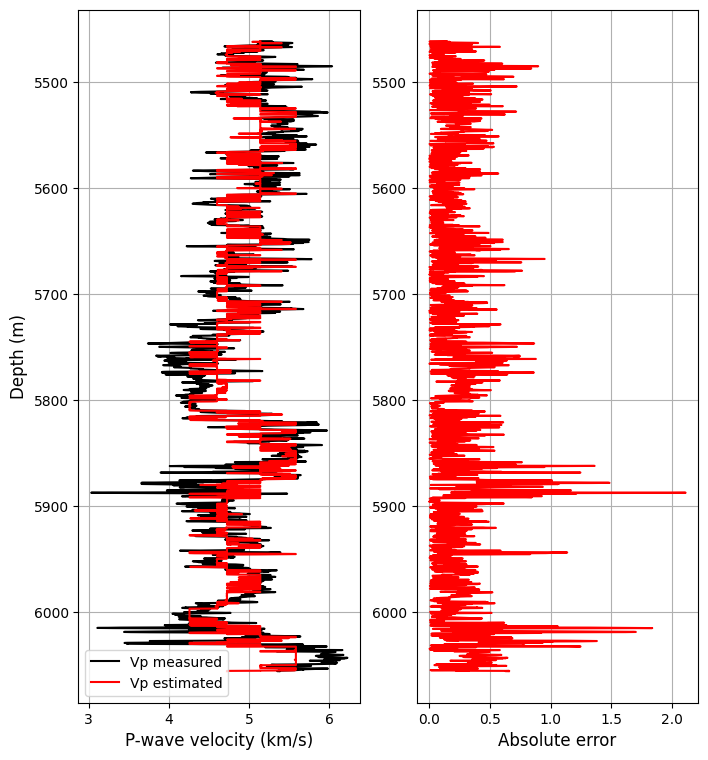

In [61]:
plt.figure(figsize=(8,9))
plt.subplot(1,2,1)
plt.plot(vp12,z12,'-k',y_pred_blind_rf,z12,'-r')
plt.gca().invert_yaxis()
plt.grid()
plt.legend(('Vp measured','Vp estimated'))
plt.xlabel('P-wave velocity (km/s)', fontsize='large')
plt.ylabel('Depth (m)', fontsize='large')

plt.subplot(1,2,2)
plt.plot(np.abs(vp12-y_pred_blind_rf),z12,'-r')
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel('Absolute error', fontsize='large')
#plt.savefig('result_vp_sklearn_randomforest.png')

In [62]:
vp_meas = vp12

np.corrcoef(vp_meas,y_pred_blind_rf)

array([[1.        , 0.76069429],
       [0.76069429, 1.        ]])

In [63]:
MSE = np.square(np.subtract(y_pred_blind_rf,vp_meas)).mean()
MSE1 = np.square(vp_meas).mean()
RMSE = math.sqrt(MSE)
print(RMSE)

0.3133252552083196


In [64]:
#Teste cego random forest

y_pred_blind_gb = regr3.predict(array12)

Text(0.5, 0, 'Absolute error')

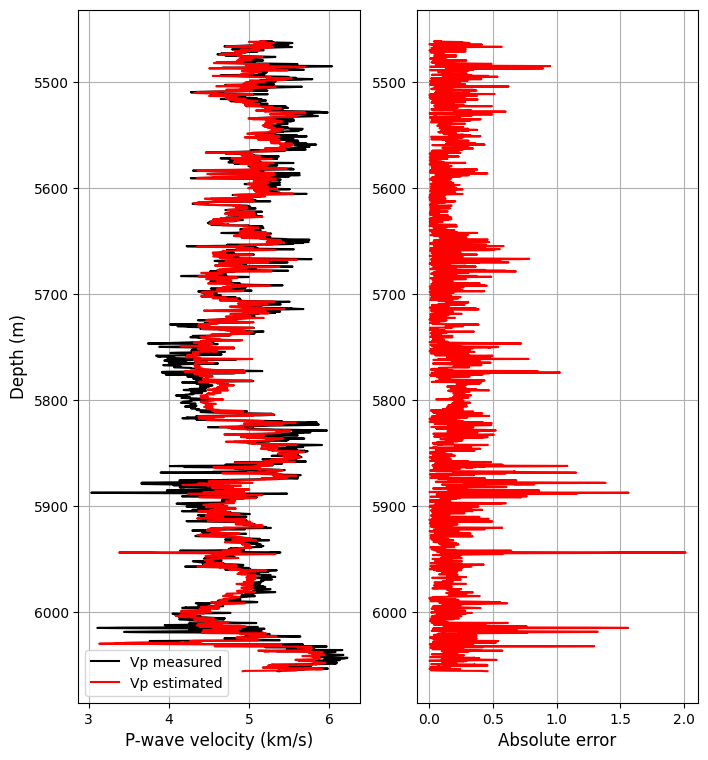

In [65]:
plt.figure(figsize=(8,9))
plt.subplot(1,2,1)
plt.plot(vp12,z12,'-k',y_pred_blind_gb,z12,'-r')
plt.gca().invert_yaxis()
plt.grid()
plt.legend(('Vp measured','Vp estimated'))
plt.xlabel('P-wave velocity (km/s)', fontsize='large')
plt.ylabel('Depth (m)', fontsize='large')

plt.subplot(1,2,2)
plt.plot(np.abs(vp12-y_pred_blind_gb),z12,'-r')
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel('Absolute error', fontsize='large')
#plt.savefig('result_vp_sklearn_gradientboosting.png')

In [66]:
vp_meas = vp12

np.corrcoef(vp_meas,y_pred_blind_gb)

array([[1.        , 0.85329622],
       [0.85329622, 1.        ]])

In [67]:
MSE = np.square(np.subtract(y_pred_blind_gb,vp_meas)).mean()
MSE1 = np.square(vp_meas).mean()
RMSE = math.sqrt(MSE)
print(RMSE)

0.25555270737009617


Text(0.5, 0, 'P-wave velocity (km/s)')

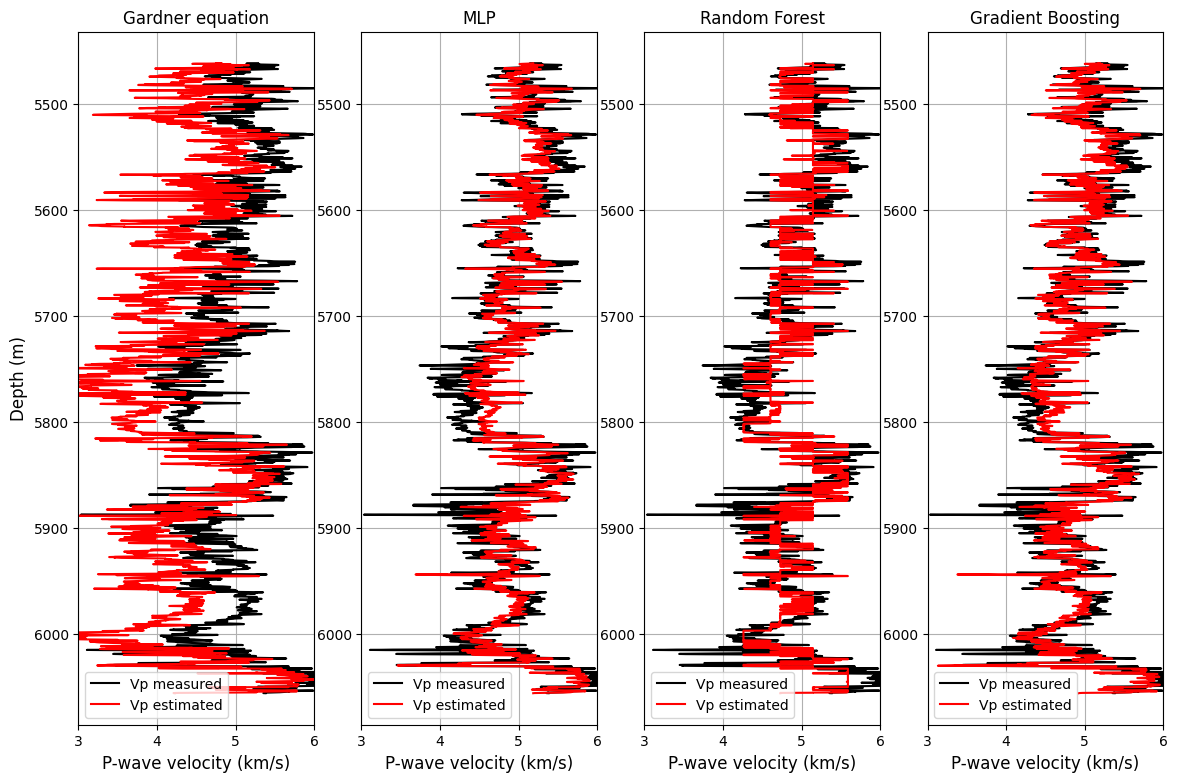

In [68]:
plt.figure(figsize=(14,9))


plt.subplot(1,4,1)
plt.title('Gardner equation')
plt.plot(vp12,z12,'-k',y_pred_gardner,z12,'-r')
plt.gca().invert_yaxis()
plt.grid()
plt.legend(('Vp measured','Vp estimated'))
plt.xlim([3, 6])
plt.xlabel('P-wave velocity (km/s)', fontsize='large')
plt.ylabel('Depth (m)', fontsize='large')

plt.subplot(1,4,2)
plt.title('MLP')
plt.plot(vp12,z12,'-k',y_pred_blind,z12,'-r')
plt.gca().invert_yaxis()
plt.grid()
plt.legend(('Vp measured','Vp estimated'))
plt.xlim([3, 6])
plt.xlabel('P-wave velocity (km/s)', fontsize='large')

plt.subplot(1,4,3)
plt.title('Random Forest')
plt.plot(vp12,z12,'-k',y_pred_blind_rf,z12,'-r')
plt.gca().invert_yaxis()
plt.grid()
plt.xlim([3, 6])
plt.legend(('Vp measured','Vp estimated'))
plt.xlabel('P-wave velocity (km/s)', fontsize='large')

plt.subplot(1,4,4)
plt.title('Gradient Boosting')
plt.plot(vp12,z12,'-k',y_pred_blind_gb,z12,'-r')
plt.gca().invert_yaxis()
plt.grid()
plt.xlim([3, 6])
plt.legend(('Vp measured','Vp estimated'))
plt.xlabel('P-wave velocity (km/s)', fontsize='large')
#plt.savefig('result_vp_rho_gr_nphi_sklearn_gard_mlp_rf_gb.png')

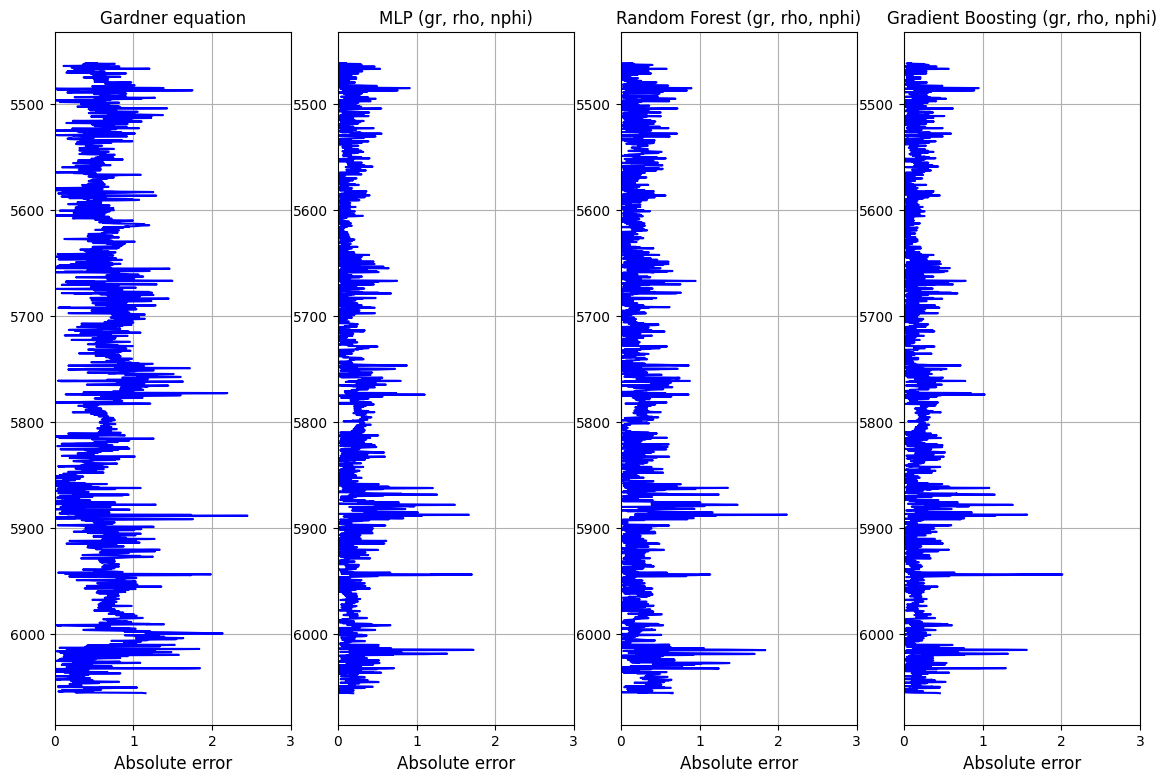

In [69]:
plt.figure(figsize=(14,9))
plt.subplot(1,4,1)
plt.title('Gardner equation')
plt.plot(np.abs(vp12-y_pred_gardner),z12,'-b')
plt.gca().invert_yaxis()
plt.grid()
plt.xlim([0, 3])
plt.xlabel('Absolute error', fontsize='large')

plt.subplot(1,4,2)
plt.title('MLP (gr, rho, nphi)')
plt.plot(np.abs(vp12-y_pred_blind),z12,'-b')
plt.gca().invert_yaxis()
plt.grid()
plt.xlim([0, 3])
plt.xlabel('Absolute error', fontsize='large')

plt.subplot(1,4,3)
plt.title('Random Forest (gr, rho, nphi)')
plt.plot(np.abs(vp12-y_pred_blind_rf),z12,'-b')
plt.gca().invert_yaxis()
plt.grid()
plt.xlim([0, 3])
plt.xlabel('Absolute error', fontsize='large')

plt.subplot(1,4,4)
plt.title('Gradient Boosting (gr, rho, nphi)')
plt.plot(np.abs(vp12-y_pred_blind_gb),z12,'-b')
plt.gca().invert_yaxis()
plt.grid()
plt.xlim([0, 3])
plt.xlabel('Absolute error', fontsize='large')
plt.savefig('absolute_errors_gr_rho_nphi.png')

Text(0.5, 0, 'P-wave velocity (km/s)')

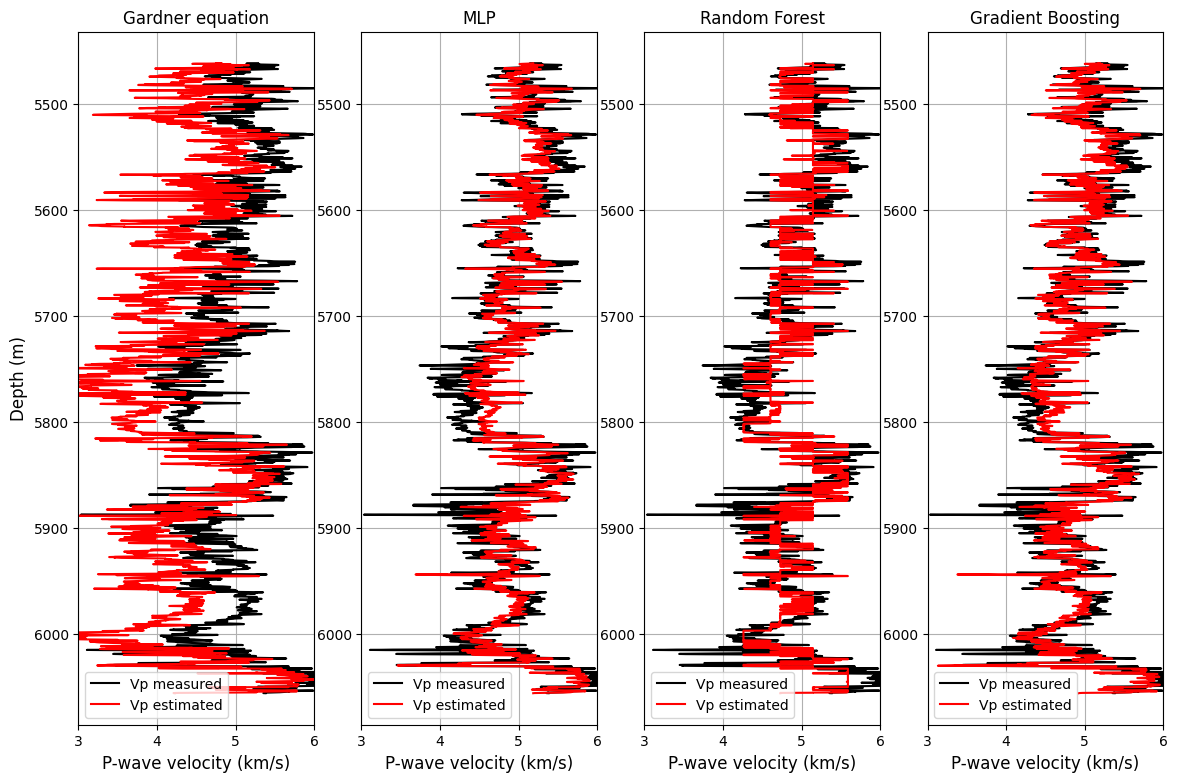

In [70]:
plt.figure(figsize=(14,9))


plt.subplot(1,4,1)
plt.title('Gardner equation')
plt.plot(vp12,z12,'-k',y_pred_gardner,z12,'-r')
plt.gca().invert_yaxis()
plt.grid()
plt.legend(('Vp measured','Vp estimated'))
plt.xlim([3, 6])
plt.xlabel('P-wave velocity (km/s)', fontsize='large')
plt.ylabel('Depth (m)', fontsize='large')

plt.subplot(1,4,2)
plt.title('MLP')
plt.plot(vp12,z12,'-k',y_pred_blind,z12,'-r')
plt.gca().invert_yaxis()
plt.grid()
plt.legend(('Vp measured','Vp estimated'))
plt.xlim([3, 6])
plt.xlabel('P-wave velocity (km/s)', fontsize='large')

plt.subplot(1,4,3)
plt.title('Random Forest')
plt.plot(vp12,z12,'-k',y_pred_blind_rf,z12,'-r')
plt.gca().invert_yaxis()
plt.grid()
plt.xlim([3, 6])
plt.legend(('Vp measured','Vp estimated'))
plt.xlabel('P-wave velocity (km/s)', fontsize='large')

plt.subplot(1,4,4)
plt.title('Gradient Boosting')
plt.plot(vp12,z12,'-k',y_pred_blind_gb,z12,'-r')
plt.gca().invert_yaxis()
plt.grid()
plt.xlim([3, 6])
plt.legend(('Vp measured','Vp estimated'))
plt.xlabel('P-wave velocity (km/s)', fontsize='large')


#plt.savefig('result_vp_rho_gr_nphi_sklearn_gard_mlp_rf_gb.png')

# Fazendo estimativas a partir de gr e nphi (modelos 3, 7 e 11) #

In [71]:
#Separando os dados para treinamento e teste

array1 = np.array([gr,phi]).T
array2 = np.array([gr2,phi2]).T
array3 = np.array([gr3,phi3]).T
array4 = np.array([gr4,phi4]).T
array5 = np.array([gr5,phi5]).T
array6 = np.array([gr6,phi6]).T
array7 = np.array([gr7,phi7]).T
array8 = np.array([gr8,phi8]).T
array9 = np.array([gr9,phi9]).T
array10 = np.array([gr10,phi10]).T
array11 = np.array([gr11,phi11]).T
array12 = np.array([gr12,phi12]).T
array13 = np.array([gr13,phi13]).T
array14 = np.array([gr14,phi14]).T
array15 = np.array([gr15,phi15]).T
array16 = np.array([gr16,phi16]).T
array18 = np.array([gr18,phi18]).T
array19 = np.array([gr19,phi19]).T
array20 = np.array([gr20,phi20]).T

x_data = np.concatenate([array1,array2,array3,array4,array5,array6,array7,array8,array9,array10,array11,array13,array14,array15,array16,array18,array19,array20])
y_data = np.concatenate([vp,vp2,vp3,vp4,vp5,vp6,vp7,vp8,vp9,vp10,vp11,vp13,vp14,vp15,vp16,vp18,vp19,vp20])

#y_data = np.reshape(y_data,(y_data.size,1))

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1)

In [72]:
regr_gr_nphi = MLPRegressor(activation='tanh',learning_rate='constant',random_state=1, max_iter=10000).fit(X_train, y_train)

In [73]:
regr_gr_nphi_randomforest = RandomForestRegressor(max_depth=2, random_state=0).fit(X_train, y_train)

In [74]:
regr_gr_nphi_gb = GradientBoostingRegressor(random_state=0).fit(X_train, y_train)

In [75]:
with open('regr_modelo3.pkl','wb') as f:
    pickle.dump(regr_gr_nphi,f)
    
with open('regr_modelo7.pkl','wb') as f:
    pickle.dump(regr_gr_nphi_randomforest,f)
    
with open('regr_modelo11.pkl','wb') as f:
    pickle.dump(regr_gr_nphi_gb,f)

# Salvando os modelos #

In [76]:
with open('regr_modelo3.pkl', 'rb') as f:
    reg3 = pickle.load(f)
    
with open('regr_modelo7.pkl', 'rb') as f:
    reg7 = pickle.load(f)
    
with open('regr_modelo11.pkl', 'rb') as f:
    reg11 = pickle.load(f)

In [77]:
y_pred_gr_nphi = regr_gr_nphi.predict(array12)

In [78]:
y_pred_gr_nphi_rf = regr_gr_nphi_randomforest.predict(array12)

In [79]:
y_pred_gr_nphi_gb = regr_gr_nphi_gb.predict(array12)

# Metricas para treinamento e teste #

In [80]:
print('Treinamento (MLP, RF, GB):')
print(regr_gr_nphi.score(X_train,y_train),regr_gr_nphi_randomforest.score(X_train,y_train),
      regr_gr_nphi_gb.score(X_train,y_train))

print('Teste (MLP, RF, GB):')
print(regr_gr_nphi.score(X_test,y_test),regr_gr_nphi_randomforest.score(X_test,y_test),regr_gr_nphi_gb.score(X_test,y_test))

#Estimando vp para o dado teste
y_pred = regr_gr_nphi.predict(X_test)
y_pred2 = regr_gr_nphi_randomforest.predict(X_test)
y_pred3 = regr_gr_nphi_gb.predict(X_test)

MSE = np.square(np.subtract(y_pred,y_test)).mean()
MSE1 = np.square(y_test).mean()
RMSE = math.sqrt(MSE)
print('RMSE for test data (MLP Regressor-modelo 3): '+str(RMSE))

MSE = np.square(np.subtract(y_pred2,y_test)).mean()
MSE1 = np.square(y_test).mean()
RMSE = math.sqrt(MSE)
print('RMSE for test data (RF Regressor-modelo 7): '+str(RMSE))

MSE = np.square(np.subtract(y_pred3,y_test)).mean()
MSE1 = np.square(y_test).mean()
RMSE = math.sqrt(MSE)
print('RMSE for test data (GB Regressor-modelo 11): '+str(RMSE))

#Estimando vp para o dado train
y_predt = regr_gr_nphi.predict(X_train)
y_predt2 = regr_gr_nphi_randomforest.predict(X_train)
y_predt3 = regr_gr_nphi_gb.predict(X_train)

MSE = np.square(np.subtract(y_predt,y_train)).mean()
MSE1 = np.square(y_train).mean()
RMSE = math.sqrt(MSE)
print('RMSE for train data (MLP Regressor-modelo 3): '+str(RMSE))

MSE = np.square(np.subtract(y_predt2,y_train)).mean()
MSE1 = np.square(y_train).mean()
RMSE = math.sqrt(MSE)
print('RMSE for train data (RF Regressor-modelo 7): '+str(RMSE))

MSE = np.square(np.subtract(y_predt3,y_train)).mean()
MSE1 = np.square(y_train).mean()
RMSE = math.sqrt(MSE)
print('RMSE for train data (GB Regressor-modelo 11): '+str(RMSE))

Treinamento (MLP, RF, GB):
0.5989246238729898 0.5076599428750619 0.6198979757647093
Teste (MLP, RF, GB):
0.5726219118644922 0.4974650442865831 0.5846211790252414
RMSE for test data (MLP Regressor-modelo 3): 0.34725235111513575
RMSE for test data (RF Regressor-modelo 7): 0.37654961419381544
RMSE for test data (GB Regressor-modelo 11): 0.3423428355730988
RMSE for train data (MLP Regressor-modelo 3): 0.33812306527940955
RMSE for train data (RF Regressor-modelo 7): 0.37462295357961917
RMSE for train data (GB Regressor-modelo 11): 0.32916366478180625


In [81]:
print('PEARSON for test data (MLP Regressor-modelo 3): '+str(np.corrcoef(y_pred,y_test)[0][1]))
print('PEARSON for test data (RF Regressor-modelo 7): '+str(np.corrcoef(y_pred2,y_test)[0][1]))
print('PEARSON for test data (GB Regressor-modelo 11): '+str(np.corrcoef(y_pred3,y_test)[0][1]))

print('PEARSON for train data (MLP Regressor-modelo 3): '+str(np.corrcoef(y_predt,y_train)[0][1]))
print('PEARSON for train data (RF Regressor-modelo 7): '+str(np.corrcoef(y_predt2,y_train)[0][1]))
print('PEARSON for train data (GB Regressor-modelo 11): '+str(np.corrcoef(y_predt3,y_train)[0][1]))

PEARSON for test data (MLP Regressor-modelo 3): 0.7579576732255472
PEARSON for test data (RF Regressor-modelo 7): 0.7055790402354062
PEARSON for test data (GB Regressor-modelo 11): 0.7646347919411716
PEARSON for train data (MLP Regressor-modelo 3): 0.7754777839384399
PEARSON for train data (RF Regressor-modelo 7): 0.7129610489418226
PEARSON for train data (GB Regressor-modelo 11): 0.7874234490231314


# Resultado para o MLP #

Text(0, 0.5, 'Depth (m)')

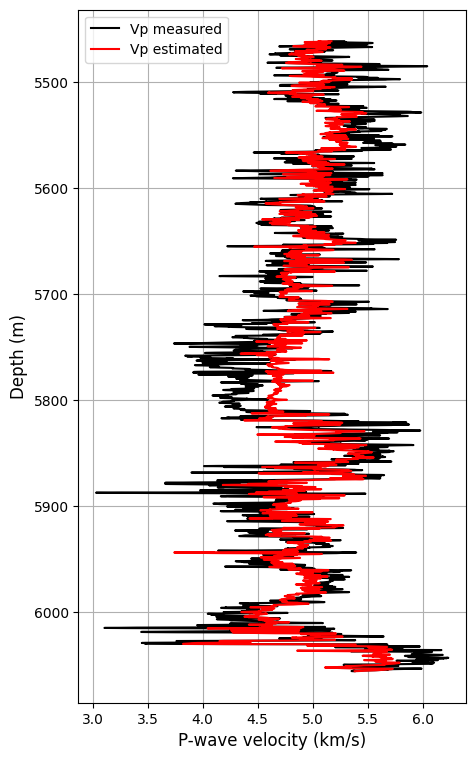

In [82]:
plt.figure(figsize=(5,9))
plt.plot(vp12,z12,'-k',y_pred_gr_nphi,z12,'-r')
plt.gca().invert_yaxis()
plt.grid()
plt.legend(('Vp measured','Vp estimated'))
plt.xlabel('P-wave velocity (km/s)', fontsize='large')
plt.ylabel('Depth (m)', fontsize='large')
#plt.savefig('result_vp_gr_nphi_sklearn_mlpregressor.png')

In [83]:
vp_meas = vp12

np.corrcoef(vp_meas,y_pred_gr_nphi)

array([[1.        , 0.81070839],
       [0.81070839, 1.        ]])

In [84]:
MSE = np.square(np.subtract(y_pred_gr_nphi,vp_meas)).mean()
MSE1 = np.square(vp_meas).mean()
RMSE = math.sqrt(MSE)
print(RMSE)

0.3042750577069124


# Resultado Random Forest #

Text(0, 0.5, 'Depth (m)')

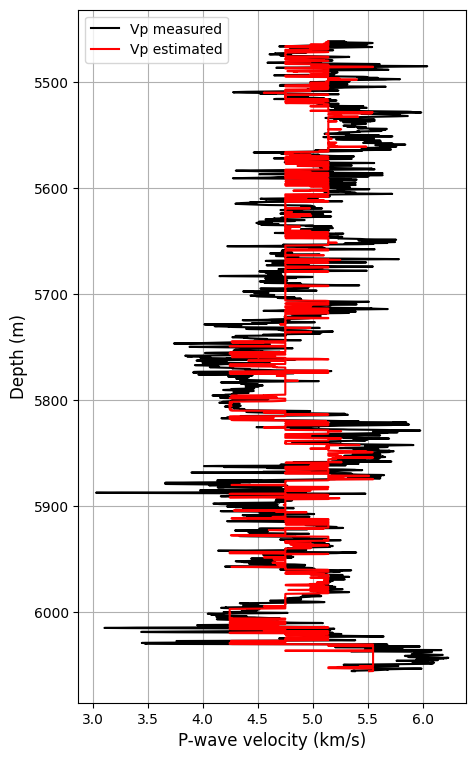

In [85]:
plt.figure(figsize=(5,9))
plt.plot(vp12,z12,'-k',y_pred_gr_nphi_rf,z12,'-r')
plt.gca().invert_yaxis()
plt.grid()
plt.legend(('Vp measured','Vp estimated'))
plt.xlabel('P-wave velocity (km/s)', fontsize='large')
plt.ylabel('Depth (m)', fontsize='large')
#plt.savefig('result_vp_gr_nphi_sklearn_rf.png')

In [86]:
vp_meas = vp12

np.corrcoef(vp_meas,y_pred_gr_nphi_rf)

array([[1.        , 0.73081738],
       [0.73081738, 1.        ]])

In [87]:
MSE = np.square(np.subtract(y_pred_gr_nphi_rf,vp_meas)).mean()
MSE1 = np.square(vp_meas).mean()
RMSE = math.sqrt(MSE)
print(RMSE)

0.33670384520518526


# Resultado gradient boosting #

Text(0, 0.5, 'Depth (m)')

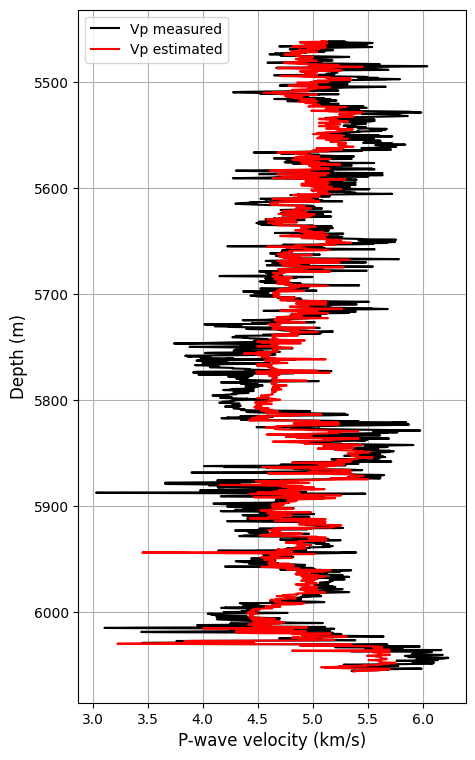

In [88]:
plt.figure(figsize=(5,9))
plt.plot(vp12,z12,'-k',y_pred_gr_nphi_gb,z12,'-r')
plt.gca().invert_yaxis()
plt.grid()
plt.legend(('Vp measured','Vp estimated'))
plt.xlabel('P-wave velocity (km/s)', fontsize='large')
plt.ylabel('Depth (m)', fontsize='large')
#plt.savefig('result_vp_gr_nphi_sklearn_gb.png')

In [89]:
vp_meas = vp12

np.corrcoef(vp_meas,y_pred_gr_nphi_gb)

array([[1.        , 0.80523131],
       [0.80523131, 1.        ]])

In [90]:
MSE = np.square(np.subtract(y_pred_gr_nphi_gb,vp_meas)).mean()
MSE1 = np.square(vp_meas).mean()
RMSE = math.sqrt(MSE)
print(RMSE)

0.3037741416530927


Text(0.5, 0, 'P-wave velocity (km/s)')

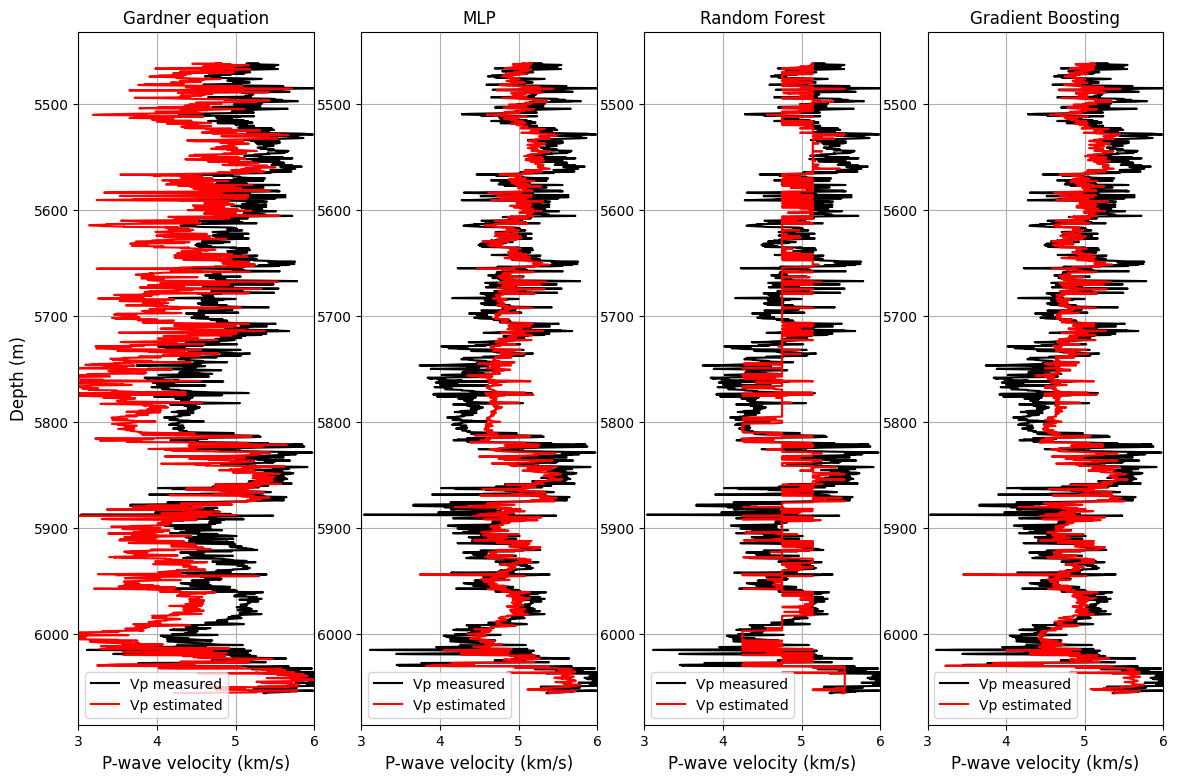

In [91]:
plt.figure(figsize=(14,9))


plt.subplot(1,4,1)
plt.title('Gardner equation')
plt.plot(vp12,z12,'-k',y_pred_gardner,z12,'-r')
plt.gca().invert_yaxis()
plt.grid()
plt.legend(('Vp measured','Vp estimated'))
plt.xlim([3, 6])
plt.xlabel('P-wave velocity (km/s)', fontsize='large')
plt.ylabel('Depth (m)', fontsize='large')

plt.subplot(1,4,2)
plt.title('MLP')
plt.plot(vp12,z12,'-k',y_pred_gr_nphi,z12,'-r')
plt.gca().invert_yaxis()
plt.grid()
plt.legend(('Vp measured','Vp estimated'))
plt.xlim([3, 6])
plt.xlabel('P-wave velocity (km/s)', fontsize='large')

plt.subplot(1,4,3)
plt.title('Random Forest')
plt.plot(vp12,z12,'-k',y_pred_gr_nphi_rf,z12,'-r')
plt.gca().invert_yaxis()
plt.grid()
plt.xlim([3, 6])
plt.legend(('Vp measured','Vp estimated'))
plt.xlabel('P-wave velocity (km/s)', fontsize='large')

plt.subplot(1,4,4)
plt.title('Gradient Boosting')
plt.plot(vp12,z12,'-k',y_pred_gr_nphi_gb,z12,'-r')
plt.gca().invert_yaxis()
plt.grid()
plt.xlim([3, 6])
plt.legend(('Vp measured','Vp estimated'))
plt.xlabel('P-wave velocity (km/s)', fontsize='large')
#plt.savefig('result_vp_gr_nphi_sklearn_gard_mlp_rf_gb.png')

Text(0.5, 0, 'Absolute error')

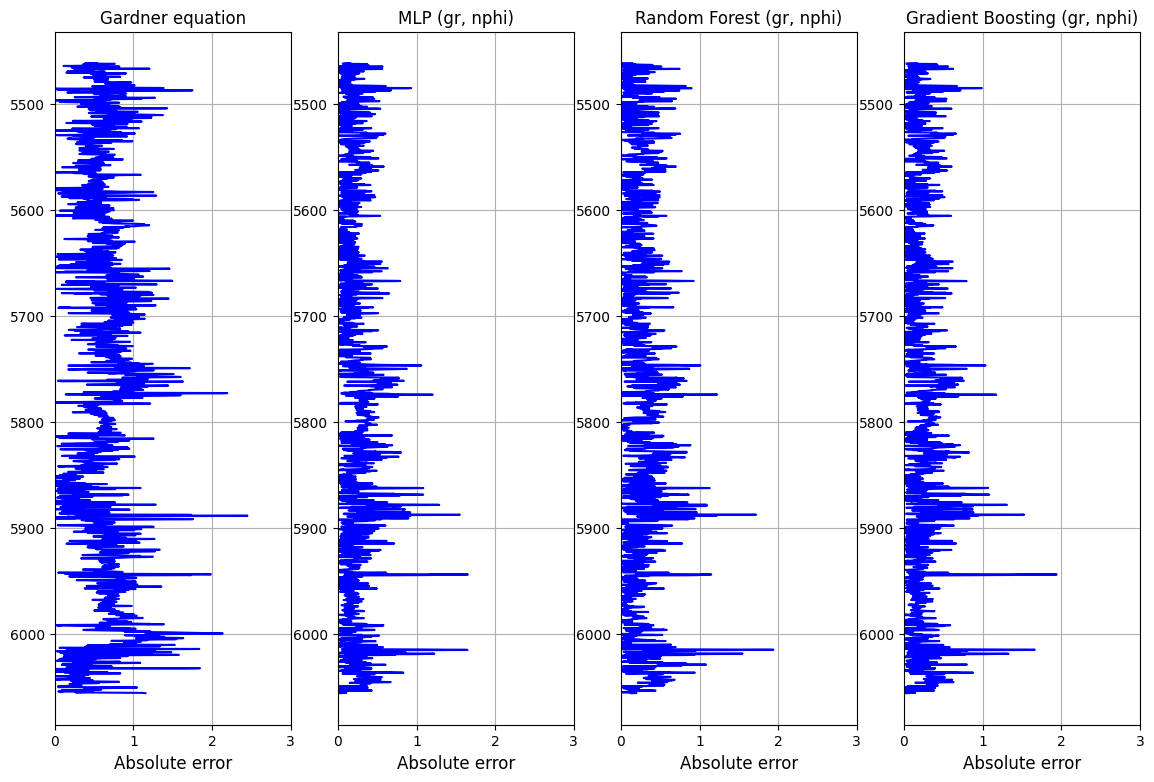

In [92]:
plt.figure(figsize=(14,9))
plt.subplot(1,4,1)
plt.title('Gardner equation')
plt.plot(np.abs(vp12-y_pred_gardner),z12,'-b')
plt.gca().invert_yaxis()
plt.grid()
plt.xlim([0, 3])
plt.xlabel('Absolute error', fontsize='large')

plt.subplot(1,4,2)
plt.title('MLP (gr, nphi)')
plt.plot(np.abs(vp12-y_pred_gr_nphi),z12,'-b')
plt.gca().invert_yaxis()
plt.grid()
plt.xlim([0, 3])
plt.xlabel('Absolute error', fontsize='large')

plt.subplot(1,4,3)
plt.title('Random Forest (gr, nphi)')
plt.plot(np.abs(vp12-y_pred_gr_nphi_rf),z12,'-b')
plt.gca().invert_yaxis()
plt.grid()
plt.xlim([0, 3])
plt.xlabel('Absolute error', fontsize='large')

plt.subplot(1,4,4)
plt.title('Gradient Boosting (gr, nphi)')
plt.plot(np.abs(vp12-y_pred_gr_nphi_gb),z12,'-b')
plt.gca().invert_yaxis()
plt.grid()
plt.xlim([0, 3])
plt.xlabel('Absolute error', fontsize='large')
#plt.savefig('absolute_errors_gr_nphi.png')

# Modelos com nphi e rho (4, 8 e 12) #

In [93]:
#Separando os dados para treinamento e teste

array1 = np.array([phi,rho]).T
array2 = np.array([phi2,rho2]).T
array3 = np.array([phi3,rho3]).T
array4 = np.array([phi4,rho4]).T
array5 = np.array([phi5,rho5]).T
array6 = np.array([phi6,rho6]).T
array7 = np.array([phi7,rho7]).T
array8 = np.array([phi8,rho8]).T
array9 = np.array([phi9,rho9]).T
array10 = np.array([phi10,rho10]).T
array11 = np.array([phi11,rho11]).T
array12 = np.array([phi12,rho12]).T
array13 = np.array([phi13,rho13]).T
array14 = np.array([phi14,rho14]).T
array15 = np.array([phi15,rho15]).T
array16 = np.array([phi16,rho16]).T
array18 = np.array([phi18,rho18]).T
array19 = np.array([phi19,rho19]).T
array20 = np.array([phi20,rho20]).T

x_data = np.concatenate([array1,array2,array3,array4,array5,array6,array7,array8,array9,array10,array11,array13,array14,array15,array16,array18,array19,array20])
y_data = np.concatenate([vp,vp2,vp3,vp4,vp5,vp6,vp7,vp8,vp9,vp10,vp11,vp13,vp14,vp15,vp16,vp18,vp19,vp20])

#y_data = np.reshape(y_data,(y_data.size,1))

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1)

In [94]:
regr_rho_nphi = MLPRegressor(activation='tanh',learning_rate='constant',random_state=1, max_iter=10000).fit(X_train, y_train)

In [95]:
regr_rho_nphi_randomforest = RandomForestRegressor(max_depth=2, random_state=0).fit(X_train, y_train)

In [96]:
regr_rho_nphi_gb = GradientBoostingRegressor(random_state=0).fit(X_train, y_train)

In [97]:
with open('regr_modelo4.pkl','wb') as f:
    pickle.dump(regr_rho_nphi,f)
    
with open('regr_modelo8.pkl','wb') as f:
    pickle.dump(regr_rho_nphi_randomforest,f)
    
with open('regr_modelo12.pkl','wb') as f:
    pickle.dump(regr_rho_nphi_gb,f)

# Salvando os modelos #

In [98]:
with open('regr_modelo4.pkl', 'rb') as f:
    reg4 = pickle.load(f)
    
with open('regr_modelo8.pkl', 'rb') as f:
    reg8 = pickle.load(f)
    
with open('regr_modelo12.pkl', 'rb') as f:
    reg12 = pickle.load(f)

In [99]:
y_pred_rho_nphi = regr_rho_nphi.predict(array12)

In [100]:
y_pred_rho_nphi_rf = regr_rho_nphi_randomforest.predict(array12)

In [101]:
y_pred_rho_nphi_gb = regr_rho_nphi_gb.predict(array12)

# Metricas para treinamento e teste #

In [102]:
print('Treinamento (MLP, RF, GB):')
print(regr_rho_nphi.score(X_train,y_train),regr_rho_nphi_randomforest.score(X_train,y_train),
      regr_rho_nphi_gb.score(X_train,y_train))

print('Teste (MLP, RF, GB):')
print(regr_rho_nphi.score(X_test,y_test),regr_rho_nphi_randomforest.score(X_test,y_test),regr_rho_nphi_gb.score(X_test,y_test))

#Estimando vp para o dado teste
y_pred = regr_rho_nphi.predict(X_test)
y_pred2 = regr_rho_nphi_randomforest.predict(X_test)
y_pred3 = regr_rho_nphi_gb.predict(X_test)

MSE = np.square(np.subtract(y_pred,y_test)).mean()
MSE1 = np.square(y_test).mean()
RMSE = math.sqrt(MSE)
print('RMSE for test data (MLP Regressor-modelo 4): '+str(RMSE))

MSE = np.square(np.subtract(y_pred2,y_test)).mean()
MSE1 = np.square(y_test).mean()
RMSE = math.sqrt(MSE)
print('RMSE for test data (RF Regressor-modelo 8): '+str(RMSE))

MSE = np.square(np.subtract(y_pred3,y_test)).mean()
MSE1 = np.square(y_test).mean()
RMSE = math.sqrt(MSE)
print('RMSE for test data (GB Regressor-modelo 12): '+str(RMSE))

#Estimando vp para o dado train
y_predt = regr_rho_nphi.predict(X_train)
y_predt2 = regr_rho_nphi_randomforest.predict(X_train)
y_predt3 = regr_rho_nphi_gb.predict(X_train)

MSE = np.square(np.subtract(y_predt,y_train)).mean()
MSE1 = np.square(y_train).mean()
RMSE = math.sqrt(MSE)
print('RMSE for train data (MLP Regressor-modelo 4): '+str(RMSE))

MSE = np.square(np.subtract(y_predt2,y_train)).mean()
MSE1 = np.square(y_train).mean()
RMSE = math.sqrt(MSE)
print('RMSE for train data (RF Regressor-modelo 8): '+str(RMSE))

MSE = np.square(np.subtract(y_predt3,y_train)).mean()
MSE1 = np.square(y_train).mean()
RMSE = math.sqrt(MSE)
print('RMSE for train data (GB Regressor-modelo 12): '+str(RMSE))

Treinamento (MLP, RF, GB):
0.6339799156968177 0.5742234678992039 0.6950298549353564
Teste (MLP, RF, GB):
0.6428237722835808 0.5645573772142578 0.6872995470172274
RMSE for test data (MLP Regressor-modelo 4): 0.32260998316286305
RMSE for test data (RF Regressor-modelo 8): 0.3562066294736375
RMSE for test data (GB Regressor-modelo 12): 0.301856675467626
RMSE for train data (MLP Regressor-modelo 4): 0.3224225174597056
RMSE for train data (RF Regressor-modelo 8): 0.34774729978619545
RMSE for train data (GB Regressor-modelo 12): 0.29430766251282026


In [103]:
print('PEARSON for test data (MLP Regressor-modelo 4): '+str(np.corrcoef(y_pred,y_test)[0][1]))
print('PEARSON for test data (RF Regressor-modelo 8): '+str(np.corrcoef(y_pred2,y_test)[0][1]))
print('PEARSON for test data (GB Regressor-modelo 12): '+str(np.corrcoef(y_pred3,y_test)[0][1]))

print('PEARSON for train data (MLP Regressor-modelo 4): '+str(np.corrcoef(y_predt,y_train)[0][1]))
print('PEARSON for train data (RF Regressor-modelo 8): '+str(np.corrcoef(y_predt2,y_train)[0][1]))
print('PEARSON for train data (GB Regressor-modelo 12): '+str(np.corrcoef(y_predt3,y_train)[0][1]))

PEARSON for test data (MLP Regressor-modelo 4): 0.802049963727663
PEARSON for test data (RF Regressor-modelo 8): 0.7526141274129342
PEARSON for test data (GB Regressor-modelo 12): 0.8291201468140246
PEARSON for train data (MLP Regressor-modelo 4): 0.7964887838133109
PEARSON for train data (RF Regressor-modelo 8): 0.7589357299895398
PEARSON for train data (GB Regressor-modelo 12): 0.8337720480266533


Text(0.5, 0, 'P-wave velocity (km/s)')

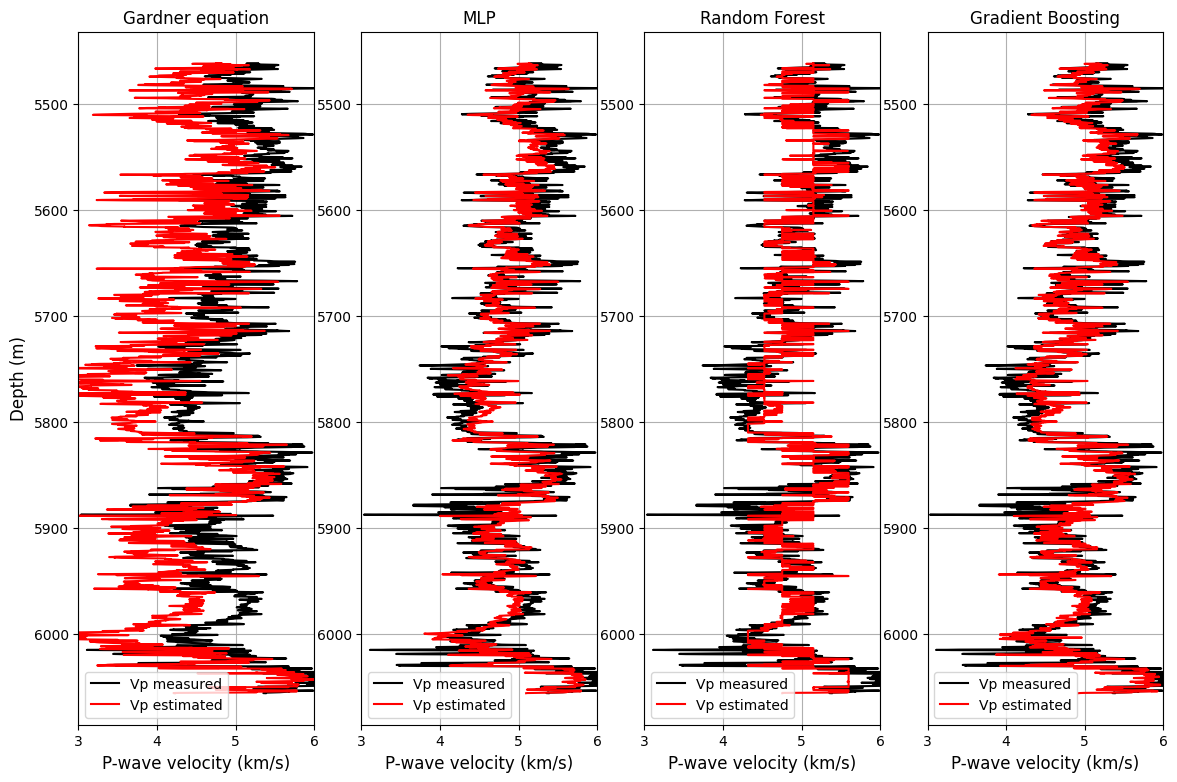

In [104]:
plt.figure(figsize=(14,9))


plt.subplot(1,4,1)
plt.title('Gardner equation')
plt.plot(vp12,z12,'-k',y_pred_gardner,z12,'-r')
plt.gca().invert_yaxis()
plt.grid()
plt.legend(('Vp measured','Vp estimated'))
plt.xlim([3, 6])
plt.xlabel('P-wave velocity (km/s)', fontsize='large')
plt.ylabel('Depth (m)', fontsize='large')

plt.subplot(1,4,2)
plt.title('MLP')
plt.plot(vp12,z12,'-k',y_pred_rho_nphi,z12,'-r')
plt.gca().invert_yaxis()
plt.grid()
plt.legend(('Vp measured','Vp estimated'))
plt.xlim([3, 6])
plt.xlabel('P-wave velocity (km/s)', fontsize='large')

plt.subplot(1,4,3)
plt.title('Random Forest')
plt.plot(vp12,z12,'-k',y_pred_rho_nphi_rf,z12,'-r')
plt.gca().invert_yaxis()
plt.grid()
plt.xlim([3, 6])
plt.legend(('Vp measured','Vp estimated'))
plt.xlabel('P-wave velocity (km/s)', fontsize='large')

plt.subplot(1,4,4)
plt.title('Gradient Boosting')
plt.plot(vp12,z12,'-k',y_pred_rho_nphi_gb,z12,'-r')
plt.gca().invert_yaxis()
plt.grid()
plt.xlim([3, 6])
plt.legend(('Vp measured','Vp estimated'))
plt.xlabel('P-wave velocity (km/s)', fontsize='large')
#plt.savefig('result_vp_rho_nphi_sklearn_gard_mlp_rf_gb.png')

In [105]:
vp_meas = vp12

np.corrcoef(vp_meas,y_pred_rho_nphi)

array([[1.        , 0.82477495],
       [0.82477495, 1.        ]])

In [106]:
MSE = np.square(np.subtract(y_pred_rho_nphi,vp_meas)).mean()
MSE1 = np.square(vp_meas).mean()
RMSE = math.sqrt(MSE)
print(RMSE)

0.2805700593716556


In [107]:
vp_meas = vp12

np.corrcoef(vp_meas,y_pred_rho_nphi_rf)

array([[1.        , 0.77521741],
       [0.77521741, 1.        ]])

In [108]:
MSE = np.square(np.subtract(y_pred_rho_nphi_rf,vp_meas)).mean()
MSE1 = np.square(vp_meas).mean()
RMSE = math.sqrt(MSE)
print(RMSE)

0.3057088909703859


In [109]:
vp_meas = vp12

np.corrcoef(vp_meas,y_pred_rho_nphi_gb)

array([[1.        , 0.82398695],
       [0.82398695, 1.        ]])

In [110]:
MSE = np.square(np.subtract(y_pred_rho_nphi_gb,vp_meas)).mean()
MSE1 = np.square(vp_meas).mean()
RMSE = math.sqrt(MSE)
print(RMSE)

0.27548694591163275


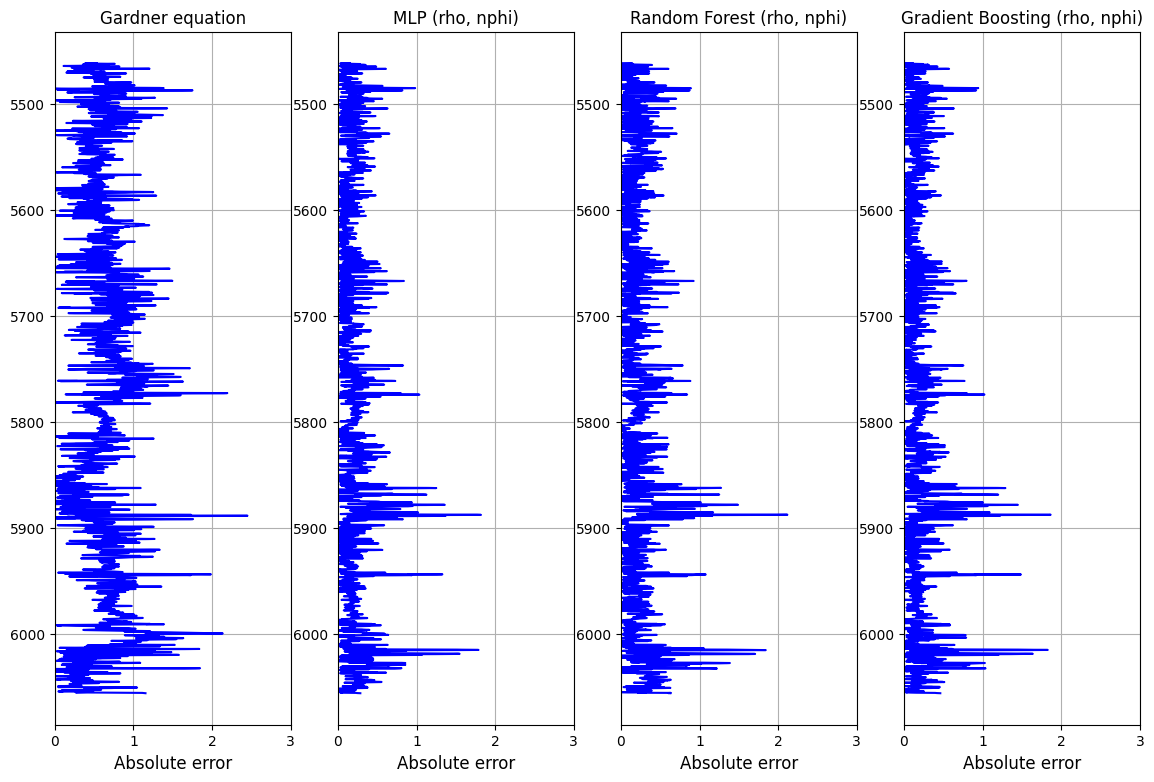

In [111]:
plt.figure(figsize=(14,9))
plt.subplot(1,4,1)
plt.title('Gardner equation')
plt.plot(np.abs(vp12-y_pred_gardner),z12,'-b')
plt.gca().invert_yaxis()
plt.grid()
plt.xlim([0, 3])
plt.xlabel('Absolute error', fontsize='large')

plt.subplot(1,4,2)
plt.title('MLP (rho, nphi)')
plt.plot(np.abs(vp12-y_pred_rho_nphi),z12,'-b')
plt.gca().invert_yaxis()
plt.grid()
plt.xlim([0, 3])
plt.xlabel('Absolute error', fontsize='large')

plt.subplot(1,4,3)
plt.title('Random Forest (rho, nphi)')
plt.plot(np.abs(vp12-y_pred_rho_nphi_rf),z12,'-b')
plt.gca().invert_yaxis()
plt.grid()
plt.xlim([0, 3])
plt.xlabel('Absolute error', fontsize='large')

plt.subplot(1,4,4)
plt.title('Gradient Boosting (rho, nphi)')
plt.plot(np.abs(vp12-y_pred_rho_nphi_gb),z12,'-b')
plt.gca().invert_yaxis()
plt.grid()
plt.xlim([0, 3])
plt.xlabel('Absolute error', fontsize='large')
plt.savefig('absolute_errors_rho_nphi.png')

# Testando o efeito da resistividade (modelos 1, 5 e 9) #

In [112]:
#Separando os dados para treinamento e teste

array1 = np.array([gr,phi,rho,res]).T
array2 = np.array([gr2,phi2,rho2,res2]).T
array3 = np.array([gr3,phi3,rho3,res3]).T
array4 = np.array([gr4,phi4,rho4,res4]).T
array5 = np.array([gr5,phi5,rho5,res5]).T
array6 = np.array([gr6,phi6,rho6,res6]).T
array7 = np.array([gr7,phi7,rho7,res7]).T
array8 = np.array([gr8,phi8,rho8,res8]).T
array9 = np.array([gr9,phi9,rho9,res9]).T
array10 = np.array([gr10,phi10,rho10,res10]).T
array11 = np.array([gr11,phi11,rho11,res11]).T
array12 = np.array([gr12,phi12,rho12,res12]).T
array13 = np.array([gr13,phi13,rho13,res13]).T
array14 = np.array([gr14,phi14,rho14,res14]).T
array15 = np.array([gr15,phi15,rho15,res15]).T
array16 = np.array([gr16,phi16,rho16,res16]).T
array18 = np.array([gr18,phi18,rho18,res18]).T
array19 = np.array([gr19,phi19,rho19,res19]).T
array20 = np.array([gr20,phi20,rho20,res20]).T

x_data = np.concatenate([array1,array2,array3,array4,array5,array6,array7,array8,array9,array10,array11,array13,array14,array15,array16,array18,array19,array20])
y_data = np.concatenate([vp,vp2,vp3,vp4,vp5,vp6,vp7,vp8,vp9,vp10,vp11,vp13,vp14,vp15,vp16,vp18,vp19,vp20])

#y_data = np.reshape(y_data,(y_data.size,1))

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1)

In [113]:
regr_gr_phi_rho_res = MLPRegressor(activation='tanh',learning_rate='constant',random_state=1, max_iter=10000).fit(X_train, y_train)

In [114]:
regr_gr_phi_rho_res_rf = RandomForestRegressor(max_depth=2, random_state=0).fit(X_train, y_train)

In [115]:
regr_gr_phi_rho_res_gb = GradientBoostingRegressor(random_state=0).fit(X_train, y_train)

# Salvando os modelos #

In [116]:
with open('regr_modelo1.pkl','wb') as f:
    pickle.dump(regr_gr_phi_rho_res,f)
    
with open('regr_modelo5.pkl','wb') as f:
    pickle.dump(regr_gr_phi_rho_res_rf,f)
    
with open('regr_modelo9.pkl','wb') as f:
    pickle.dump(regr_gr_phi_rho_res_gb,f)

In [117]:
with open('regr_modelo1.pkl', 'rb') as f:
    reg1 = pickle.load(f)
    
with open('regr_modelo5.pkl', 'rb') as f:
    reg5 = pickle.load(f)
    
with open('regr_modelo9.pkl', 'rb') as f:
    reg9 = pickle.load(f)

In [118]:
y_pred_gr_phi_rho_res = regr_gr_phi_rho_res.predict(array12)

In [119]:
y_pred_gr_phi_rho_res_rf = regr_gr_phi_rho_res_rf.predict(array12)

In [120]:
y_pred_gr_phi_rho_res_gb = regr_gr_phi_rho_res_gb.predict(array12)

# Metricas para treinamento e teste #

In [121]:
print('Treinamento (MLP, RF, GB):')
print(regr_gr_phi_rho_res.score(X_train,y_train),regr_gr_phi_rho_res_rf.score(X_train,y_train),
      regr_gr_phi_rho_res_gb.score(X_train,y_train))

print('Teste (MLP, RF, GB):')
print(regr_gr_phi_rho_res.score(X_test,y_test),regr_gr_phi_rho_res_rf.score(X_test,y_test),
      regr_gr_phi_rho_res_gb.score(X_test,y_test))

#Estimando vp para o dado teste
y_pred = regr_gr_phi_rho_res.predict(X_test)
y_pred2 = regr_gr_phi_rho_res_rf.predict(X_test)
y_pred3 = regr_gr_phi_rho_res_gb.predict(X_test)

MSE = np.square(np.subtract(y_pred,y_test)).mean()
MSE1 = np.square(y_test).mean()
RMSE = math.sqrt(MSE)
print('RMSE for test data (MLP Regressor-modelo 1): '+str(RMSE))

MSE = np.square(np.subtract(y_pred2,y_test)).mean()
MSE1 = np.square(y_test).mean()
RMSE = math.sqrt(MSE)
print('RMSE for test data (RF Regressor-modelo 5): '+str(RMSE))

MSE = np.square(np.subtract(y_pred3,y_test)).mean()
MSE1 = np.square(y_test).mean()
RMSE = math.sqrt(MSE)
print('RMSE for test data (GB Regressor-modelo 9): '+str(RMSE))

#Estimando vp para o dado train
y_predt = regr_gr_phi_rho_res.predict(X_train)
y_predt2 = regr_gr_phi_rho_res_rf.predict(X_train)
y_predt3 = regr_gr_phi_rho_res_gb.predict(X_train)

MSE = np.square(np.subtract(y_predt,y_train)).mean()
MSE1 = np.square(y_train).mean()
RMSE = math.sqrt(MSE)
print('RMSE for train data (MLP Regressor-modelo 1): '+str(RMSE))

MSE = np.square(np.subtract(y_predt2,y_train)).mean()
MSE1 = np.square(y_train).mean()
RMSE = math.sqrt(MSE)
print('RMSE for train data (RF Regressor-modelo 5): '+str(RMSE))

MSE = np.square(np.subtract(y_predt3,y_train)).mean()
MSE1 = np.square(y_train).mean()
RMSE = math.sqrt(MSE)
print('RMSE for train data (GB Regressor-modelo 9): '+str(RMSE))

Treinamento (MLP, RF, GB):
0.5257608473758001 0.5732690943952818 0.7667147758153323
Teste (MLP, RF, GB):
0.5048840527706755 0.575999441001805 0.7530718725693573
RMSE for test data (MLP Regressor-modelo 1): 0.3645582764730606
RMSE for test data (RF Regressor-modelo 5): 0.33736243259153037
RMSE for test data (GB Regressor-modelo 9): 0.25745349178957677
RMSE for train data (MLP Regressor-modelo 1): 0.36864782927628964
RMSE for train data (RF Regressor-modelo 5): 0.34969548630314273
RMSE for train data (GB Regressor-modelo 9): 0.25855717508632453


In [122]:
print('PEARSON for test data (MLP Regressor-modelo 1): '+str(np.corrcoef(y_pred,y_test)[0][1]))
print('PEARSON for test data (RF Regressor-modelo 5): '+str(np.corrcoef(y_pred2,y_test)[0][1]))
print('PEARSON for test data (GB Regressor-modelo 9): '+str(np.corrcoef(y_pred3,y_test)[0][1]))

print('PEARSON for train data (MLP Regressor-modelo 1): '+str(np.corrcoef(y_predt,y_train)[0][1]))
print('PEARSON for train data (RF Regressor-modelo 5): '+str(np.corrcoef(y_predt2,y_train)[0][1]))
print('PEARSON for train data (GB Regressor-modelo 9): '+str(np.corrcoef(y_predt3,y_train)[0][1]))


PEARSON for test data (MLP Regressor-modelo 1): 0.7121721415705914
PEARSON for test data (RF Regressor-modelo 5): 0.759601055165171
PEARSON for test data (GB Regressor-modelo 9): 0.8680115179348078
PEARSON for train data (MLP Regressor-modelo 1): 0.7260760430693106
PEARSON for train data (RF Regressor-modelo 5): 0.758336011460428
PEARSON for train data (GB Regressor-modelo 9): 0.8757860010778784


Text(0.5, 0, 'P-wave velocity (km/s)')

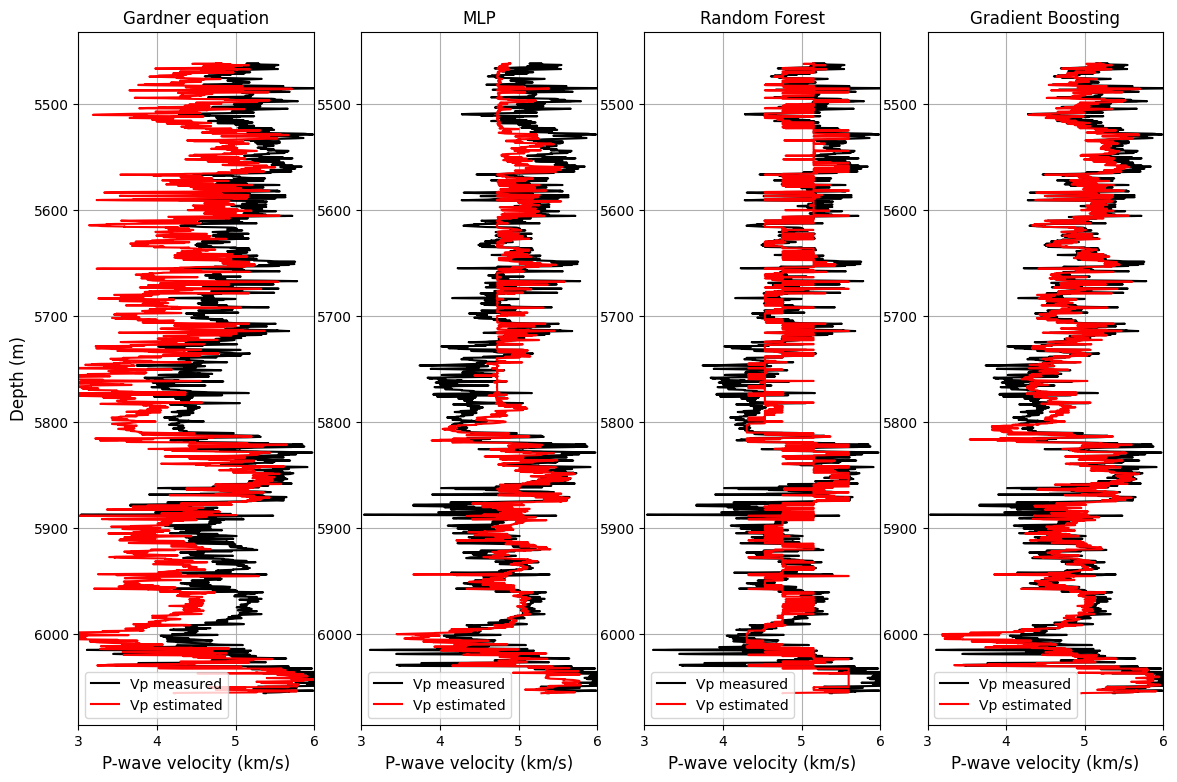

In [123]:
plt.figure(figsize=(14,9))


plt.subplot(1,4,1)
plt.title('Gardner equation')
plt.plot(vp12,z12,'-k',y_pred_gardner,z12,'-r')
plt.gca().invert_yaxis()
plt.grid()
plt.legend(('Vp measured','Vp estimated'))
plt.xlim([3, 6])
plt.xlabel('P-wave velocity (km/s)', fontsize='large')
plt.ylabel('Depth (m)', fontsize='large')

plt.subplot(1,4,2)
plt.title('MLP')
plt.plot(vp12,z12,'-k',y_pred_gr_phi_rho_res,z12,'-r')
plt.gca().invert_yaxis()
plt.grid()
plt.legend(('Vp measured','Vp estimated'))
plt.xlim([3, 6])
plt.xlabel('P-wave velocity (km/s)', fontsize='large')

plt.subplot(1,4,3)
plt.title('Random Forest')
plt.plot(vp12,z12,'-k',y_pred_gr_phi_rho_res_rf,z12,'-r')
plt.gca().invert_yaxis()
plt.grid()
plt.xlim([3, 6])
plt.legend(('Vp measured','Vp estimated'))
plt.xlabel('P-wave velocity (km/s)', fontsize='large')

plt.subplot(1,4,4)
plt.title('Gradient Boosting')
plt.plot(vp12,z12,'-k',y_pred_gr_phi_rho_res_gb,z12,'-r')
plt.gca().invert_yaxis()
plt.grid()
plt.xlim([3, 6])
plt.legend(('Vp measured','Vp estimated'))
plt.xlabel('P-wave velocity (km/s)', fontsize='large')
#plt.savefig('result_vp_gr_phi_rho_res_sklearn_gard_mlp_rf_gb.png')

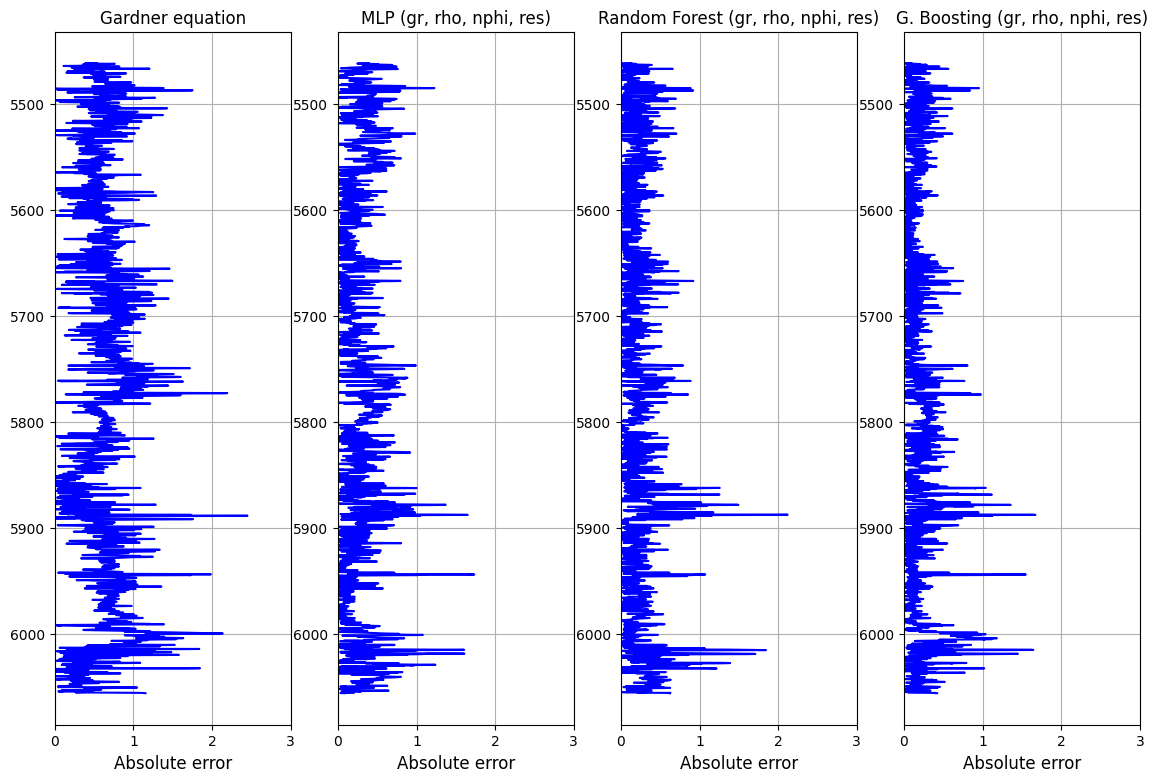

In [124]:
plt.figure(figsize=(14,9))
plt.subplot(1,4,1)
plt.title('Gardner equation')
plt.plot(np.abs(vp12-y_pred_gardner),z12,'-b')
plt.gca().invert_yaxis()
plt.grid()
plt.xlim([0, 3])
plt.xlabel('Absolute error', fontsize='large')

plt.subplot(1,4,2)
plt.title('MLP (gr, rho, nphi, res)')
plt.plot(np.abs(vp12-y_pred_gr_phi_rho_res),z12,'-b')
plt.gca().invert_yaxis()
plt.grid()
plt.xlim([0, 3])
plt.xlabel('Absolute error', fontsize='large')

plt.subplot(1,4,3)
plt.title('Random Forest (gr, rho, nphi, res)')
plt.plot(np.abs(vp12-y_pred_gr_phi_rho_res_rf),z12,'-b')
plt.gca().invert_yaxis()
plt.grid()
plt.xlim([0, 3])
plt.xlabel('Absolute error', fontsize='large')

plt.subplot(1,4,4)
plt.title('G. Boosting (gr, rho, nphi, res)')
plt.plot(np.abs(vp12-y_pred_gr_phi_rho_res_gb),z12,'-b')
plt.gca().invert_yaxis()
plt.grid()
plt.xlim([0, 3])
plt.xlabel('Absolute error', fontsize='large')
plt.savefig('absolute_errors_gr_rho_nphi_res.png')

In [125]:
vp_meas = vp12

np.corrcoef(vp_meas,y_pred_gr_phi_rho_res)

array([[1.       , 0.6544065],
       [0.6544065, 1.       ]])

In [126]:
vp_meas = vp12

np.corrcoef(vp_meas,y_pred_gr_phi_rho_res_rf)

array([[1.        , 0.77265972],
       [0.77265972, 1.        ]])

In [127]:
vp_meas = vp12

np.corrcoef(vp_meas,y_pred_gr_phi_rho_res_gb)

array([[1.     , 0.82035],
       [0.82035, 1.     ]])

In [128]:
MSE = np.square(np.subtract(y_pred_gr_phi_rho_res,vp_meas)).mean()
MSE1 = np.square(vp_meas).mean()
RMSE = math.sqrt(MSE)
print(RMSE)

0.36593023312862377


In [129]:
MSE = np.square(np.subtract(y_pred_gr_phi_rho_res_rf,vp_meas)).mean()
MSE1 = np.square(vp_meas).mean()
RMSE = math.sqrt(MSE)
print(RMSE)

0.30722128116336184


In [130]:
MSE = np.square(np.subtract(y_pred_gr_phi_rho_res_gb,vp_meas)).mean()
MSE1 = np.square(vp_meas).mean()
RMSE = math.sqrt(MSE)
print(RMSE)

0.2774312459912705


In [131]:
#np.savetxt('9-BRSA-1197-RJS.txt',np.array([z17,rho17,phi17,vp_pred_blind_17_gb,gr17]).T)

In [132]:
#well_litho = lasio.read('9-BRSA-1197-RJS-las_completo.las')

# Regressao a partir de RHO apenas #

In [133]:
#Separando os dados para treinamento e teste

array1 = np.array([rho]).T
array2 = np.array([rho2]).T
array3 = np.array([rho3]).T
array4 = np.array([rho4]).T
array5 = np.array([rho5]).T
array6 = np.array([rho6]).T
array7 = np.array([rho7]).T
array8 = np.array([rho8]).T
array9 = np.array([rho9]).T
array10 = np.array([rho10]).T
array11 = np.array([rho11]).T
array12 = np.array([rho12]).T
array13 = np.array([rho13]).T
array14 = np.array([rho14]).T
array15 = np.array([rho15]).T
array16 = np.array([rho16]).T
array18 = np.array([rho18]).T
array19 = np.array([rho19]).T
array20 = np.array([rho20]).T

x_data = np.concatenate([array1,array2,array3,array4,array5,array6,array7,array8,array9,array10,array11,array13,array14,array15,array16,array18,array19,array20])
y_data = np.concatenate([vp,vp2,vp3,vp4,vp5,vp6,vp7,vp8,vp9,vp10,vp11,vp13,vp14,vp15,vp16,vp18,vp19,vp20])

#y_data = np.reshape(y_data,(y_data.size,1))

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1)

In [134]:
regr_rho_mlp = MLPRegressor(hidden_layer_sizes=(50,),activation='logistic', solver='lbfgs',learning_rate='constant',random_state=1, max_iter=8000).fit(X_train, y_train)

regr_rho_gb = GradientBoostingRegressor(min_samples_split=10, min_samples_leaf=7,max_depth=3,random_state=0).fit(X_train, y_train)

In [135]:
y_pred_rho_gb = regr_rho_gb.predict(array12)

Text(0.5, 0, 'P-wave velocity (km/s)')

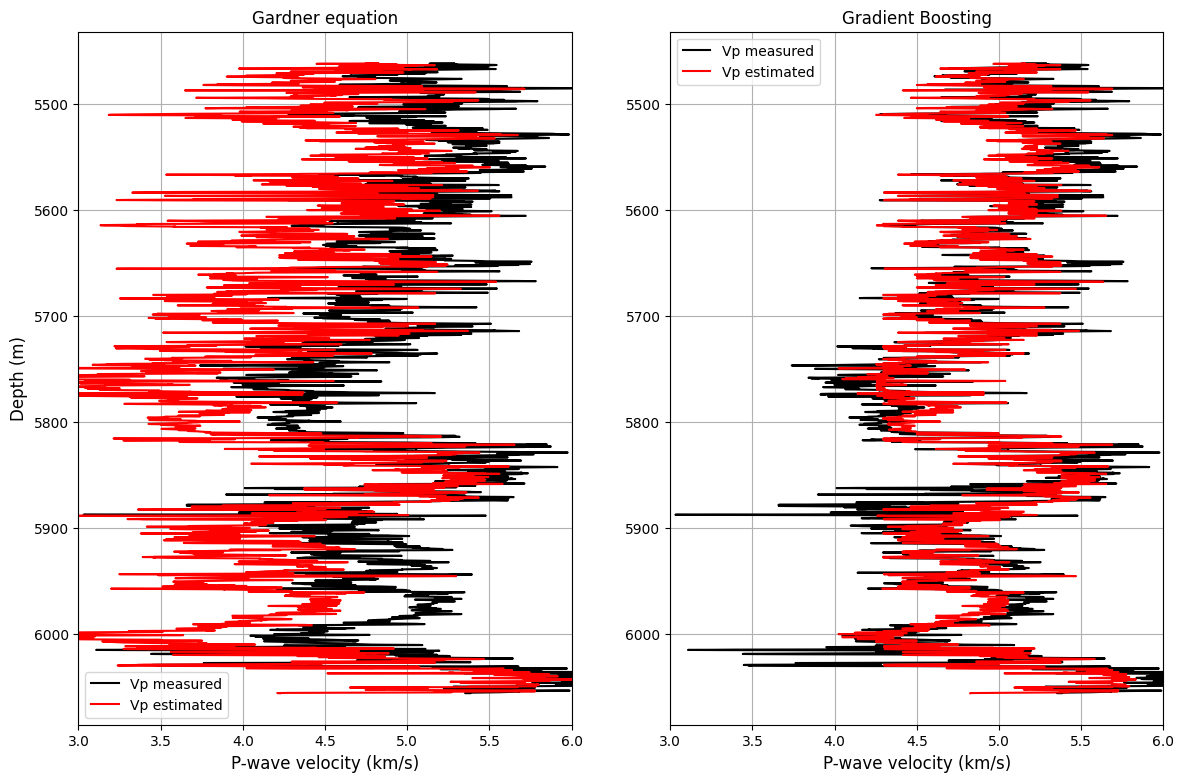

In [136]:
plt.figure(figsize=(14,9))


plt.subplot(1,2,1)
plt.title('Gardner equation')
plt.plot(vp12,z12,'-k',y_pred_gardner,z12,'-r')
plt.gca().invert_yaxis()
plt.grid()
plt.legend(('Vp measured','Vp estimated'))
plt.xlim([3, 6])
plt.xlabel('P-wave velocity (km/s)', fontsize='large')
plt.ylabel('Depth (m)', fontsize='large')

plt.subplot(1,2,2)
plt.title('Gradient Boosting')
plt.plot(vp12,z12,'-k',y_pred_rho_gb,z12,'-r')
plt.gca().invert_yaxis()
plt.grid()
plt.xlim([3, 6])
plt.legend(('Vp measured','Vp estimated'))
plt.xlabel('P-wave velocity (km/s)', fontsize='large')

In [137]:
with open('regr_modelo_rho.pkl','wb') as f:
    pickle.dump(regr_rho_gb,f)

with open('regr_modelo_rho_mlp.pkl','wb') as f:
    pickle.dump(regr_rho_mlp,f)